#Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="whitegrid", palette="muted")

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve
import statsmodels.api as sm

#Reading Data

In [ ]:
data = pd.read_csv("data.csv")

In [ ]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
col = data.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
y1 = data.diagnosis
X1 = data.drop(['Unnamed: 32','id','diagnosis'],axis = 1 )

In [ ]:
y1

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

Number of Benign: 357
Number of Malignant: 212


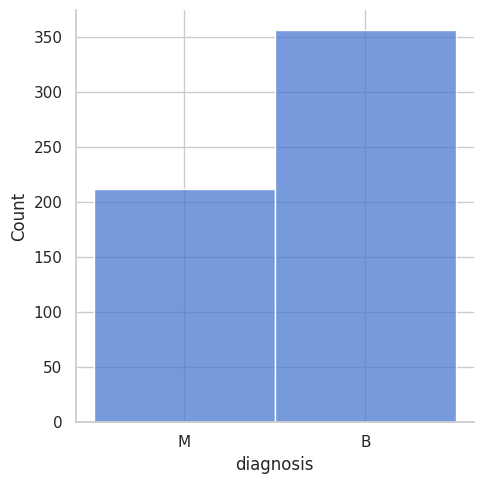

In [ ]:
ax = sns.displot(y1, label="Count")       # M = 212, B = 357
B, M = y1.value_counts()
print('Number of Benign:',B)
print('Number of Malignant:',M)

In [ ]:
true_labels=y1.replace({'B': 0, 'M': 1})

In [ ]:
true_labels.name="True Label"

In [ ]:
true_labels

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: True Label, Length: 569, dtype: int64

In [ ]:
X1

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#Data Pre-Processing

In [ ]:
# data_dia = y1
# data = X
# data_n_2 = (data - data.mean()) / (data.std())              # standardization

In [ ]:
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(X1)
X = pd.DataFrame(standard_df, columns = X1.columns)#, columns =['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se', 'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se', 'smoothness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'])

In [ ]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


<Axes: >

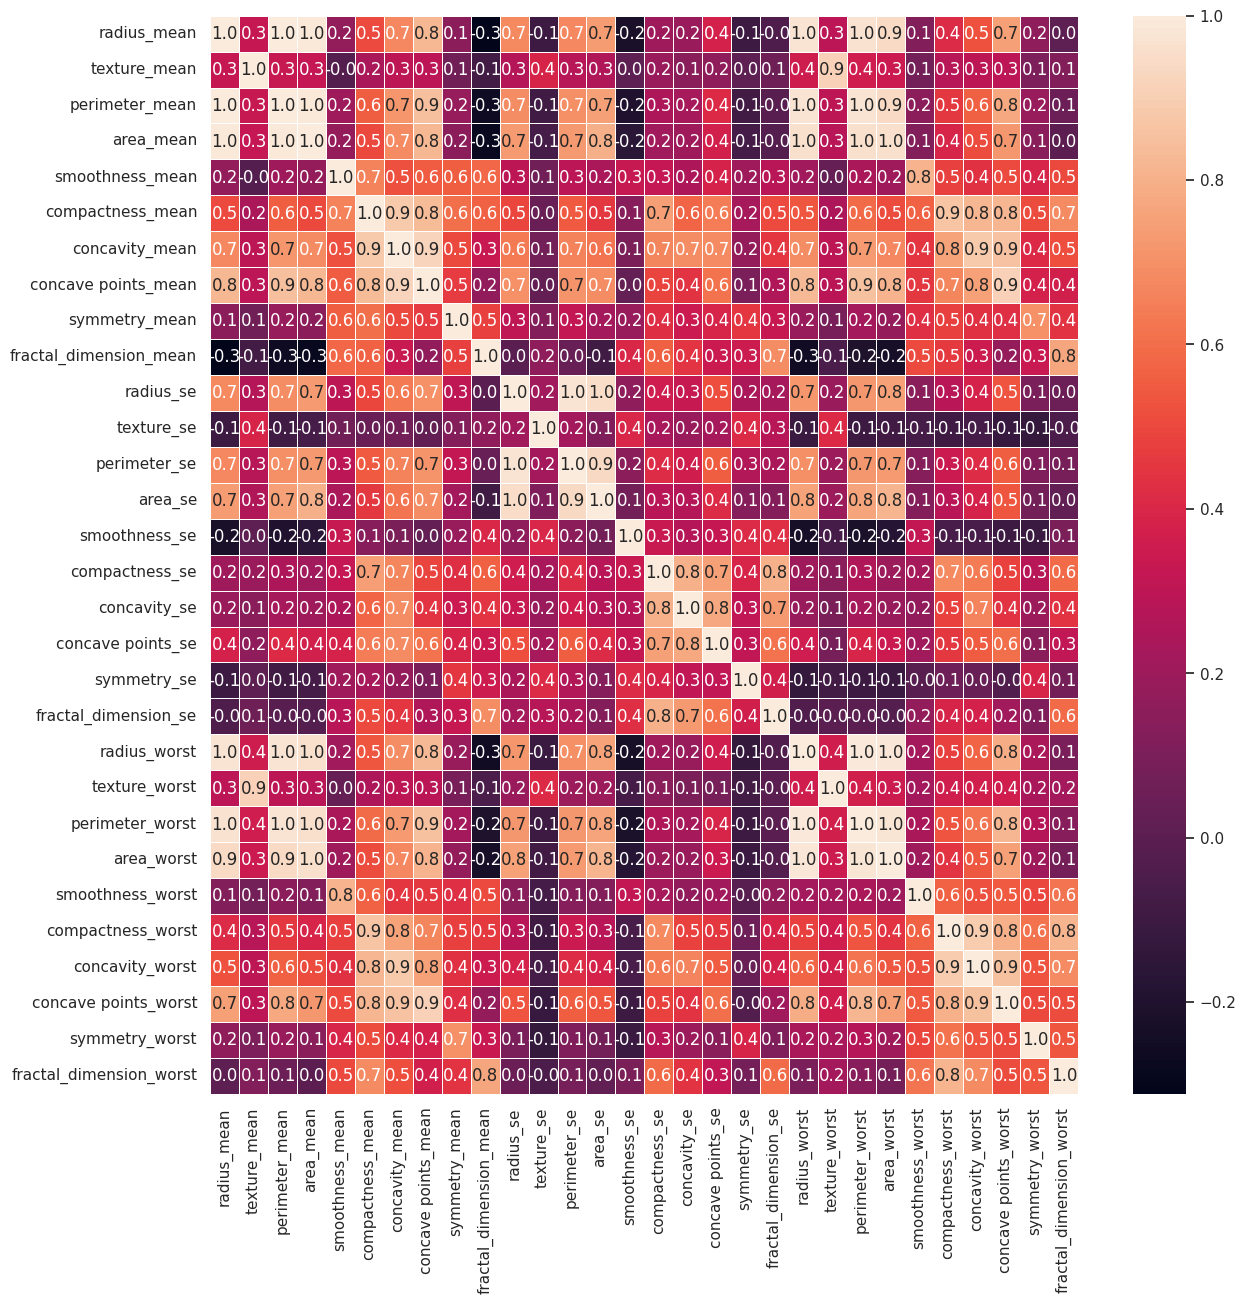

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = X.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,-2.073335,0.984375,1.568466,2.652874,2.217515,2.255747,-0.565265,2.487578,-0.214002,0.724026,1.148757,0.907083,1.307686,2.109526,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.023846,0.001392,-0.868652,-0.876244,0.742402,-0.605351,-0.440780,-0.805450,-0.099444,-0.375612,-0.146749,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.363478,0.939685,-0.398008,-0.780083,1.181336,-0.297005,0.213076,0.237036,0.293559,0.527407,0.854974,1.152255,0.201391
3,0.253732,-0.764464,3.283553,1.915897,2.867383,4.910919,-0.110409,-0.288378,0.689702,0.819518,4.732680,2.047511,3.394275,1.989588,6.046041,4.935010
4,-1.151816,1.826229,0.280372,1.371011,-0.009560,-0.562450,-0.790244,1.190357,1.483067,0.828471,-0.361092,0.499328,0.220556,0.613179,-0.868353,-0.397100


<Axes: >

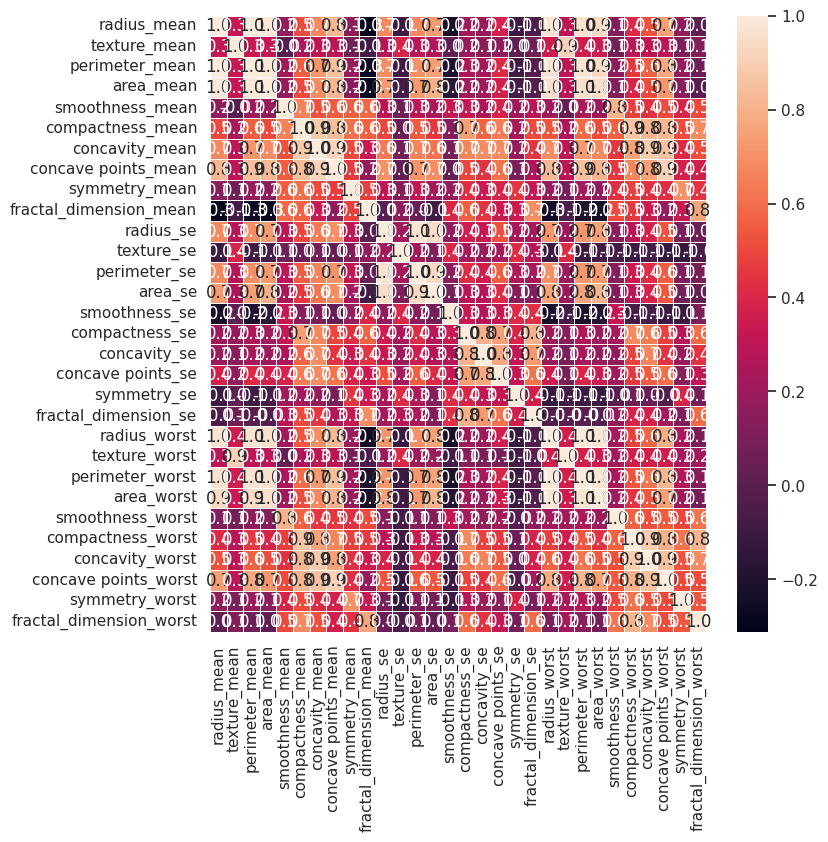

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
#checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=X[['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se', 'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se', 'smoothness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                    Feature        VIF
0              texture_mean   1.697703
1                 area_mean   9.236196
2           smoothness_mean   6.020966
3            concavity_mean  20.808774
4             symmetry_mean   3.618168
5    fractal_dimension_mean   9.070721
6                texture_se   2.019419
7                   area_se   3.665774
8             smoothness_se   3.205930
9              concavity_se   7.039615
10              symmetry_se   3.978747
11     fractal_dimension_se   6.475185
12         smoothness_worst   8.298561
13          concavity_worst  20.296197
14           symmetry_worst   7.011948
15  fractal_dimension_worst  13.267688


In [ ]:
x1 = np.append(arr = np.ones((569, 1)).astype(int), values = X, axis = 1)

In [ ]:
#choose a significance level usually 0.05, if p > 0.05
#for the highest values parameter, remove that value
x_opt = x1[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]]
ols = sm.OLS(endog = true_labels, exog = x_opt).fit()
ols.summary()

(569, 17)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             True Label   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     84.53
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          8.94e-137
Time:                        18:48:23   Log-Likelihood:                -41.550
No. Observations:                 569   AIC:                             117.1
Df Residuals:                     552   BIC:                             190.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3726      0.011     33.629      0.000       0.351       0.394
x1             0.0611      0.014      4.230      0.000       0.033       0.089
x2             0.1502      0.034      4.460      0.000       0.084       0.216
x3             0.0214      0.027      0.788      0.431      -0.032       0.075
x4             0.1518      0.051      3.003      0.003       0.053       0.251
x5            -0.0058      0.021     -0.276      0.782      -0.047       0.036
x6            -0.1427      0.033     -4.276      0.000      -0.208      -0.077
x7             0.0195      0.016      1.238      0.216      -0.011       0.050
x8            -0.0027      0.021     -0.129      0.897      -0.044       0.039
x9             0.0191      0.020      0.965      0.335      -0.020       0.058
x10           -0.0897      0.029     -3.050      0.002      -0.147      -0.032
x11           -0.0104      0.022     -0.471      0.638      -0.054       0.033
x12            0.0368      0.028      1.305      0.193      -0.019       0.092
x13            0.0628      0.032      1.967      0.050    9.26e-05       0.125
x14            0.0620      0.050      1.242      0.215      -0.036       0.160
x15            0.0771      0.029      2.627      0.009       0.019       0.135
x16            0.0666      0.040      1.651      0.099      -0.013       0.146
==============================================================================
Omnibus:                       29.616   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.049
Skew:                           0.523   Prob(JB):                     4.04e-08
Kurtosis:                       3.584   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_opt1 = x1[:, [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]]
ols = sm.OLS(endog = true_labels, exog = x_opt1).fit()
ols.summary()

(569, 16)

In [ ]:
x_opt2 = x1[:, [0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]]
ols = sm.OLS(endog = true_labels, exog = x_opt2).fit()
ols.summary()

(569, 15)

In [ ]:
x_opt3 = x1[:, [0, 1, 2, 4, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16]]
ols = sm.OLS(endog = true_labels, exog = x_opt3).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             True Label   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     104.0
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          2.75e-139
Time:                        18:37:49   Log-Likelihood:                -42.725
No. Observations:                 569   AIC:                             113.5
Df Residuals:                     555   BIC:                             174.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3726      0.011     33.651      0.000       0.351       0.394
x1             0.0683      0.012      5.600      0.000       0.044       0.092
x2             0.1458      0.033      4.422      0.000       0.081       0.211
x3             0.1656      0.048      3.468      0.001       0.072       0.259
x4            -0.1362      0.032     -4.297      0.000      -0.198      -0.074
x5            -0.0021      0.021     -0.100      0.921      -0.043       0.039
x6             0.0157      0.019      0.834      0.405      -0.021       0.053
x7            -0.0925      0.029     -3.171      0.002      -0.150      -0.035
x8             0.0020      0.020      0.100      0.920      -0.037       0.041
x9             0.0384      0.028      1.372      0.171      -0.017       0.093
x10            0.0819      0.022      3.726      0.000       0.039       0.125
x11            0.0544      0.049      1.104      0.270      -0.042       0.151
x12            0.0636      0.021      2.970      0.003       0.022       0.106
x13            0.0612      0.039      1.554      0.121      -0.016       0.139
==============================================================================
Omnibus:                       33.370   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.752
Skew:                           0.550   Prob(JB):                     2.33e-09
Kurtosis:                       3.682   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_opt4 = x1[:, [0, 1, 2, 4, 6, 9, 10, 11, 12, 13, 14, 15, 16]]
ols = sm.OLS(endog = true_labels, exog = x_opt4).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             True Label   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     112.9
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          2.54e-140
Time:                        18:37:49   Log-Likelihood:                -42.730
No. Observations:                 569   AIC:                             111.5
Df Residuals:                     556   BIC:                             167.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3726      0.011     33.681      0.000       0.351       0.394
x1             0.0683      0.012      5.604      0.000       0.044       0.092
x2             0.1440      0.028      5.224      0.000       0.090       0.198
x3             0.1651      0.047      3.477      0.001       0.072       0.258
x4            -0.1363      0.032     -4.309      0.000      -0.198      -0.074
x5             0.0156      0.019      0.831      0.407      -0.021       0.052
x6            -0.0928      0.029     -3.195      0.001      -0.150      -0.036
x7             0.0016      0.020      0.083      0.934      -0.037       0.040
x8             0.0387      0.028      1.386      0.166      -0.016       0.093
x9             0.0818      0.022      3.728      0.000       0.039       0.125
x10            0.0551      0.049      1.133      0.258      -0.040       0.151
x11            0.0639      0.021      3.017      0.003       0.022       0.106
x12            0.0609      0.039      1.553      0.121      -0.016       0.138
==============================================================================
Omnibus:                       33.181   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.546
Skew:                           0.548   Prob(JB):                     2.59e-09
Kurtosis:                       3.684   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_opt5 = x1[:, [0, 1, 2, 4, 6, 10, 11, 12, 13, 14, 15, 16]]
ols = sm.OLS(endog = true_labels, exog = x_opt5).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             True Label   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     123.1
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          3.15e-141
Time:                        18:37:49   Log-Likelihood:                -43.083
No. Observations:                 569   AIC:                             110.2
Df Residuals:                     557   BIC:                             162.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3726      0.011     33.690      0.000       0.351       0.394
x1             0.0696      0.012      5.751      0.000       0.046       0.093
x2             0.1417      0.027      5.168      0.000       0.088       0.196
x3             0.1678      0.047      3.541      0.000       0.075       0.261
x4            -0.1381      0.032     -4.376      0.000      -0.200      -0.076
x5            -0.0902      0.029     -3.124      0.002      -0.147      -0.033
x6             0.0090      0.018      0.516      0.606      -0.025       0.043
x7             0.0428      0.027      1.562      0.119      -0.011       0.097
x8             0.0935      0.017      5.555      0.000       0.060       0.127
x9             0.0486      0.048      1.012      0.312      -0.046       0.143
x10            0.0567      0.019      2.937      0.003       0.019       0.095
x11            0.0594      0.039      1.515      0.130      -0.018       0.136
==============================================================================
Omnibus:                       33.007   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.985
Skew:                           0.551   Prob(JB):                     3.42e-09
Kurtosis:                       3.656   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_opt6 = x1[:, [0, 1, 2, 4, 6, 10, 12, 13, 14, 15, 16]]
ols = sm.OLS(endog = true_labels, exog = x_opt6).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             True Label   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     135.6
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          3.01e-142
Time:                        18:37:49   Log-Likelihood:                -43.219
No. Observations:                 569   AIC:                             108.4
Df Residuals:                     558   BIC:                             156.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3726      0.011     33.712      0.000       0.351       0.394
x1             0.0703      0.012      5.854      0.000       0.047       0.094
x2             0.1408      0.027      5.148      0.000       0.087       0.194
x3             0.1711      0.047      3.648      0.000       0.079       0.263
x4            -0.1338      0.030     -4.395      0.000      -0.194      -0.074
x5            -0.0897      0.029     -3.112      0.002      -0.146      -0.033
x6             0.0462      0.027      1.733      0.084      -0.006       0.098
x7             0.0918      0.016      5.565      0.000       0.059       0.124
x8             0.0451      0.047      0.950      0.343      -0.048       0.138
x9             0.0632      0.014      4.374      0.000       0.035       0.092
x10            0.0527      0.037      1.425      0.155      -0.020       0.125
==============================================================================
Omnibus:                       32.206   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.758
Skew:                           0.545   Prob(JB):                     6.32e-09
Kurtosis:                       3.636   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_opt7 = x1[:, [0, 1, 2, 4, 6, 10, 13, 14, 15, 16]]
ols = sm.OLS(endog = true_labels, exog = x_opt7).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             True Label   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     149.8
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          1.06e-142
Time:                        18:37:49   Log-Likelihood:                -44.747
No. Observations:                 569   AIC:                             109.5
Df Residuals:                     559   BIC:                             152.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3726      0.011     33.652      0.000       0.351       0.394
x1             0.0714      0.012      5.944      0.000       0.048       0.095
x2             0.1478      0.027      5.456      0.000       0.095       0.201
x3             0.1834      0.046      3.948      0.000       0.092       0.275
x4            -0.1279      0.030     -4.220      0.000      -0.187      -0.068
x5            -0.0554      0.021     -2.640      0.009      -0.097      -0.014
x6             0.0860      0.016      5.315      0.000       0.054       0.118
x7             0.0041      0.041      0.100      0.921      -0.077       0.085
x8             0.0593      0.014      4.146      0.000       0.031       0.087
x9             0.0878      0.031      2.826      0.005       0.027       0.149
==============================================================================
Omnibus:                       30.690   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.494
Skew:                           0.534   Prob(JB):                     1.96e-08
Kurtosis:                       3.598   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_opt8 = x1[:, [0, 1, 2, 4, 6, 10, 13, 15, 16]]
ols = sm.OLS(endog = true_labels, exog = x_opt8).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             True Label   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     168.8
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          7.93e-144
Time:                        18:37:49   Log-Likelihood:                -44.752
No. Observations:                 569   AIC:                             107.5
Df Residuals:                     560   BIC:                             146.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3726      0.011     33.682      0.000       0.351       0.394
x1             0.0714      0.012      5.950      0.000       0.048       0.095
x2             0.1470      0.026      5.646      0.000       0.096       0.198
x3             0.1864      0.035      5.274      0.000       0.117       0.256
x4            -0.1299      0.023     -5.768      0.000      -0.174      -0.086
x5            -0.0547      0.020     -2.735      0.006      -0.094      -0.015
x6             0.0863      0.016      5.412      0.000       0.055       0.118
x7             0.0596      0.014      4.252      0.000       0.032       0.087
x8             0.0900      0.021      4.206      0.000       0.048       0.132
==============================================================================
Omnibus:                       30.859   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.753
Skew:                           0.535   Prob(JB):                     1.72e-08
Kurtosis:                       3.603   Cond. No.                         7.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=X[['texture_mean','area_mean', 'concavity_mean', 'fractal_dimension_mean', 'concavity_se', 'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst']]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                   Feature        VIF
0             texture_mean   1.176977
1                area_mean   5.543283
2           concavity_mean  10.206000
3   fractal_dimension_mean   4.148348
4             concavity_se   3.273926
5         smoothness_worst   2.076359
6           symmetry_worst   1.604910
7  fractal_dimension_worst   3.741052


In [ ]:
X

,texture_mean,area_mean,concavity_mean,fractal_dimension_mean,concavity_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,-2.073335,0.984375,2.652874,2.255747,0.724026,1.307686,2.750622,1.937015
1,-0.353632,1.908708,-0.023846,-0.868652,-0.440780,-0.375612,-0.243890,0.281190
2,0.456187,1.558884,1.363478,-0.398008,0.213076,0.527407,1.152255,0.201391
3,0.253732,-0.764464,1.915897,4.910919,0.819518,3.394275,6.046041,4.935010
4,-1.151816,1.826229,1.371011,-0.562450,0.828471,0.220556,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...
564,0.721473,2.343856,1.947285,-0.931027,0.666001,0.378365,-1.360158,-0.709091
565,2.085134,1.723842,0.693043,-1.058611,0.252202,-0.691230,-0.531855,-0.973978
566,2.045574,0.577953,0.046588,-0.895587,0.510827,-0.809587,-1.104549,-0.318409
567,2.336457,1.735218,3.296944,1.043695,1.302285,1.430427,1.919083,2.219635


#Two-coin model for 5 radiologists

In [ ]:
no_of_features=len(X.columns)

In [ ]:
n=len(true_labels)

In [ ]:
alpha=[0.90, 0.80, 0.57, 0.60, 0.55]
beta=[0.95, 0.85, 0.62, 0.65, 0.58]

In [ ]:
y=np.zeros((n, 5))
for i in range(n):
  for j in range(5):
    if true_labels[i]==1:
      y[i][j]=np.random.binomial(1, alpha[j])
    else:
      y[i][j]=np.random.binomial(1, 1-beta[j])

In [ ]:
y

array([[1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 0.],
       ...,
       [0., 1., 1., 1., 1.],
       [1., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1.]])

In [ ]:
y=y.astype(int)
df1=pd.DataFrame(y, columns=[1, 2, 3, 4, 5])
df1.index += 1
df1=df1.to_dict('index')

In [ ]:
for i in range(n):
  for j in range(5):
    df1[i+1][j+1]=[df1[i+1][j+1]]

In [ ]:
df1

{1: {1: [1], 2: [1], 3: [0], 4: [0], 5: [0]},
 2: {1: [1], 2: [1], 3: [1], 4: [0], 5: [1]},
 3: {1: [1], 2: [1], 3: [1], 4: [1], 5: [0]},
 4: {1: [1], 2: [1], 3: [0], 4: [1], 5: [1]},
 5: {1: [1], 2: [1], 3: [0], 4: [0], 5: [1]},
 6: {1: [1], 2: [1], 3: [0], 4: [1], 5: [1]},
 7: {1: [0], 2: [1], 3: [0], 4: [0], 5: [0]},
 8: {1: [1], 2: [1], 3: [0], 4: [1], 5: [1]},
 9: {1: [1], 2: [1], 3: [1], 4: [1], 5: [1]},
 10: {1: [1], 2: [1], 3: [0], 4: [1], 5: [0]},
 11: {1: [1], 2: [1], 3: [1], 4: [0], 5: [0]},
 12: {1: [0], 2: [1], 3: [1], 4: [0], 5: [1]},
 13: {1: [1], 2: [0], 3: [1], 4: [1], 5: [0]},
 14: {1: [1], 2: [1], 3: [1], 4: [0], 5: [0]},
 15: {1: [1], 2: [1], 3: [1], 4: [0], 5: [1]},
 16: {1: [1], 2: [1], 3: [0], 4: [0], 5: [1]},
 17: {1: [1], 2: [1], 3: [0], 4: [1], 5: [0]},
 18: {1: [1], 2: [1], 3: [1], 4: [1], 5: [0]},
 19: {1: [1], 2: [0], 3: [0], 4: [1], 5: [1]},
 20: {1: [0], 2: [1], 3: [1], 4: [1], 5: [0]},
 21: {1: [0], 2: [1], 3: [1], 4: [0], 5: [0]},
 22: {1: [0], 2: [1], 

In [ ]:
annotators=pd.DataFrame(y, columns=['A1', 'A2', 'A3', 'A4', 'A5'])

In [ ]:
final=pd.concat([X, true_labels, annotators], axis=1, join='inner')

In [ ]:
final

,texture_mean,area_mean,concavity_mean,fractal_dimension_mean,concavity_se,smoothness_worst,symmetry_worst,fractal_dimension_worst,True Label,A1,A2,A3,A4,A5
0,-2.073335,0.984375,2.652874,2.255747,0.724026,1.307686,2.750622,1.937015,1,1,1,0,0,0
1,-0.353632,1.908708,-0.023846,-0.868652,-0.440780,-0.375612,-0.243890,0.281190,1,1,1,1,0,1
2,0.456187,1.558884,1.363478,-0.398008,0.213076,0.527407,1.152255,0.201391,1,1,1,1,1,0
3,0.253732,-0.764464,1.915897,4.910919,0.819518,3.394275,6.046041,4.935010,1,1,1,0,1,1
4,-1.151816,1.826229,1.371011,-0.562450,0.828471,0.220556,-0.868353,-0.397100,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,2.343856,1.947285,-0.931027,0.666001,0.378365,-1.360158,-0.709091,1,1,0,0,1,1
565,2.085134,1.723842,0.693043,-1.058611,0.252202,-0.691230,-0.531855,-0.973978,1,1,1,0,1,1
566,2.045574,0.577953,0.046588,-0.895587,0.510827,-0.809587,-1.104549,-0.318409,1,0,1,1,1,1
567,2.336457,1.735218,3.296944,1.043695,1.302285,1.430427,1.919083,2.219635,1,1,1,1,0,0


#Majority voting

In [ ]:
maj_label1=y.sum(axis=1)/5

In [ ]:
maj_label1

array([0.4, 0.8, 0.8, 0.8, 0.6, 0.8, 0.2, 0.8, 1. , 0.6, 0.6, 0.6, 0.6,
       0.6, 0.8, 0.6, 0.6, 0.8, 0.6, 0.6, 0.4, 0.4, 0.8, 0.8, 0.6, 0.6,
       1. , 0.8, 0.8, 0.8, 0.6, 0.8, 0.8, 1. , 0.8, 0.6, 0.6, 0.6, 0.4,
       0.8, 0.8, 0.6, 0.6, 0.6, 0.4, 0.8, 0. , 0.8, 0.6, 0.4, 0.6, 0.2,
       0.4, 0.8, 0.6, 0. , 1. , 0.8, 0.4, 0.2, 0. , 0.2, 0.4, 0.2, 0.6,
       0.8, 0.2, 0. , 0.4, 0.4, 0.6, 0.2, 0.8, 0.8, 0.4, 0.4, 0.4, 0.8,
       0.6, 0.4, 0. , 0.2, 0.6, 0.4, 0. , 1. , 0.8, 0.4, 0. , 0.8, 0. ,
       0.6, 0.6, 0.2, 1. , 0.8, 0.4, 0.6, 0.2, 0.8, 0.8, 0. , 0.2, 0.2,
       0.4, 0.6, 0.2, 0.4, 0.8, 0. , 0.4, 0. , 0.4, 0.6, 0.4, 0. , 0.4,
       0.6, 0.6, 0.2, 0.2, 0.4, 0.8, 0.2, 0.2, 0.2, 0.6, 0.6, 0. , 0.8,
       0. , 0.4, 0.8, 0.2, 0.4, 0.6, 0.2, 0.4, 0.4, 0.2, 0.2, 0.8, 0. ,
       0.4, 0.2, 0.4, 0.6, 0.2, 0.4, 0.4, 0.2, 0.6, 0. , 0. , 0.6, 0.2,
       0.4, 0.4, 0. , 0. , 0. , 1. , 0.8, 0.4, 0.8, 0.4, 0.4, 0.6, 0.8,
       0.2, 0.2, 0.8, 0.6, 0. , 0.2, 0.4, 0. , 0.4, 0. , 0.2, 0.

In [ ]:
maj_label2=[]
for i in maj_label1:
  if i>=0.5:
    maj_label2.append(1)
  else:
    maj_label2.append(0)

In [ ]:
maj_label2=np.array(maj_label2)

In [ ]:
maj_label2

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [ ]:
final.insert(len(final.columns),'Majority label', maj_label2)

In [ ]:
final

,texture_mean,area_mean,concavity_mean,fractal_dimension_mean,concavity_se,smoothness_worst,symmetry_worst,fractal_dimension_worst,True Label,A1,A2,A3,A4,A5,Majority label
0,-2.073335,0.984375,2.652874,2.255747,0.724026,1.307686,2.750622,1.937015,1,1,1,0,0,0,0
1,-0.353632,1.908708,-0.023846,-0.868652,-0.440780,-0.375612,-0.243890,0.281190,1,1,1,1,0,1,1
2,0.456187,1.558884,1.363478,-0.398008,0.213076,0.527407,1.152255,0.201391,1,1,1,1,1,0,1
3,0.253732,-0.764464,1.915897,4.910919,0.819518,3.394275,6.046041,4.935010,1,1,1,0,1,1,1
4,-1.151816,1.826229,1.371011,-0.562450,0.828471,0.220556,-0.868353,-0.397100,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,2.343856,1.947285,-0.931027,0.666001,0.378365,-1.360158,-0.709091,1,1,0,0,1,1,1
565,2.085134,1.723842,0.693043,-1.058611,0.252202,-0.691230,-0.531855,-0.973978,1,1,1,0,1,1,1
566,2.045574,0.577953,0.046588,-0.895587,0.510827,-0.809587,-1.104549,-0.318409,1,0,1,1,1,1,1
567,2.336457,1.735218,3.296944,1.043695,1.302285,1.430427,1.919083,2.219635,1,1,1,1,0,0,1


In [ ]:
final.insert(len(final.columns),'Soft Probablistic Estimate', maj_label1)

In [ ]:
final

,texture_mean,area_mean,concavity_mean,fractal_dimension_mean,concavity_se,smoothness_worst,symmetry_worst,fractal_dimension_worst,True Label,A1,A2,A3,A4,A5,Majority label,Soft Probablistic Estimate
0,-2.073335,0.984375,2.652874,2.255747,0.724026,1.307686,2.750622,1.937015,1,1,1,0,0,0,0,0.4
1,-0.353632,1.908708,-0.023846,-0.868652,-0.440780,-0.375612,-0.243890,0.281190,1,1,1,1,0,1,1,0.8
2,0.456187,1.558884,1.363478,-0.398008,0.213076,0.527407,1.152255,0.201391,1,1,1,1,1,0,1,0.8
3,0.253732,-0.764464,1.915897,4.910919,0.819518,3.394275,6.046041,4.935010,1,1,1,0,1,1,1,0.8
4,-1.151816,1.826229,1.371011,-0.562450,0.828471,0.220556,-0.868353,-0.397100,1,1,1,0,0,1,1,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,2.343856,1.947285,-0.931027,0.666001,0.378365,-1.360158,-0.709091,1,1,0,0,1,1,1,0.6
565,2.085134,1.723842,0.693043,-1.058611,0.252202,-0.691230,-0.531855,-0.973978,1,1,1,0,1,1,1,0.8
566,2.045574,0.577953,0.046588,-0.895587,0.510827,-0.809587,-1.104549,-0.318409,1,0,1,1,1,1,1,0.8
567,2.336457,1.735218,3.296944,1.043695,1.302285,1.430427,1.919083,2.219635,1,1,1,1,0,0,1,0.6


In [ ]:
print("Accuracy based on majority label:",len(np.where(final['True Label']==final['Majority label'])[0])/n)

Accuracy based on majority label: 0.8699472759226714


#EM Algorithm (DS)

In [ ]:
import sys

def main():
    # load the data from the paper
    responses = generate_sample_data()
    # run EM
    a=run(responses)
    return(a)

def run(responses, tol=0.00001, max_iter=100, init='average'):
    # convert responses to counts
    (patients, observers, classes, counts) = responses_to_counts(responses)
    print("num Patients:", len(patients))
    print("Observers:", observers)
    print("Classes:", classes)

    # initialize
    iter = 0
    converged = False
    old_class_marginals = None
    old_error_rates = None

    patient_classes = initialize(counts)

    print("Iter\tlog-likelihood\t\tdelta-CM\tdelta-ER"    )

    # while not converged do:
    while not converged:
        iter += 1

        # M-step
        (class_marginals, error_rates) = m_step(counts, patient_classes)

        # E-setp
        patient_classes = e_step(counts, class_marginals, error_rates)

        # check likelihood
        log_L = calc_likelihood(counts, class_marginals, error_rates)

        # check for convergence
        if old_class_marginals is not None:
            class_marginals_diff = np.sum(np.abs(class_marginals - old_class_marginals))
            error_rates_diff = np.sum(np.abs(error_rates - old_error_rates))
            print(iter ,'\t', log_L, '\t%.6f\t%.6f' % (class_marginals_diff, error_rates_diff)   )
            if (class_marginals_diff < tol and error_rates_diff < tol) or iter > max_iter:
                converged = True
        else:
            print(iter ,'\t', log_L)

        # update current values
        old_class_marginals = class_marginals
        old_error_rates = error_rates

    # Print final results
    np.set_printoptions(precision=2, suppress=True)
    print("Class marginals")
    print(class_marginals)
    print("Error rates")
    print(error_rates)

    print("Incidence-of-error rates")
    [nPatients, nObservers, nClasses] = np.shape(counts)
    for k in range(nObservers):
        print(class_marginals * error_rates[k,:,:])

    np.set_printoptions(precision=4, suppress=True)
    print("Patient classes")
    for i in range(nPatients):
        print(patients[i], patient_classes[i,:] )


    return patient_classes

def responses_to_counts(responses):
    patients = list(responses.keys())
    patients.sort()
    nPatients = len(patients)

    # determine the observers and classes
    observers = set()
    classes = set()
    for i in patients:
        i_observers = responses[i].keys()
        for k in i_observers:
            if k not in observers:
                observers.add(k)
            ik_responses = responses[i][k]
            classes.update(ik_responses)

    classes = list(classes)
    classes.sort()
    nClasses = len(classes)

    observers = list(observers)
    observers.sort()
    nObservers = len(observers)

    # create a 3d array to hold counts
    counts = np.zeros([nPatients, nObservers, nClasses])

    # convert responses to counts
    for patient in patients:
        i = patients.index(patient)
        for observer in responses[patient].keys():
            k = observers.index(observer)
            for response in responses[patient][observer]:
                j = classes.index(response)
                counts[i,k,j] += 1


    return (patients, observers, classes, counts)

def initialize(counts):
    [nPatients, nObservers, nClasses] = np.shape(counts)
    # sum over observers
    response_sums = np.sum(counts,1)
    # create an empty array
    patient_classes = np.zeros([nPatients, nClasses])
    # for each patient, take the average number of observations in each class
    for p in range(nPatients):
        patient_classes[p,:] = response_sums[p,:] / np.sum(response_sums[p,:],dtype=float)

    return patient_classes

def m_step(counts, patient_classes):
    [nPatients, nObservers, nClasses] = np.shape(counts)

    # compute class marginals
    class_marginals = np.sum(patient_classes,0)/float(nPatients)

    # compute error rates
    error_rates = np.zeros([nObservers, nClasses, nClasses])
    for k in range(nObservers):
        for j in range(nClasses):
            for l in range(nClasses):
                error_rates[k, j, l] = np.dot(patient_classes[:,j], counts[:,k,l])
            # normalize by summing over all observation classes
            sum_over_responses = np.sum(error_rates[k,j,:])
            if sum_over_responses > 0:
                error_rates[k,j,:] = error_rates[k,j,:]/float(sum_over_responses)

    return (class_marginals, error_rates)


def e_step(counts, class_marginals, error_rates):
    [nPatients, nObservers, nClasses] = np.shape(counts)

    patient_classes = np.zeros([nPatients, nClasses])

    for i in range(nPatients):
        for j in range(nClasses):
            estimate = class_marginals[j]
            estimate *= np.prod(np.power(error_rates[:,j,:], counts[i,:,:]))

            patient_classes[i,j] = estimate
        # normalize error rates by dividing by the sum over all observation classes
        patient_sum = np.sum(patient_classes[i,:])
        if patient_sum > 0:
            patient_classes[i,:] = patient_classes[i,:]/float(patient_sum)

    return patient_classes


def calc_likelihood(counts, class_marginals, error_rates):
    [nPatients, nObservers, nClasses] = np.shape(counts)
    log_L = 0.0

    for i in range(nPatients):
        patient_likelihood = 0.0
        for j in range(nClasses):

            class_prior = class_marginals[j]
            patient_class_likelihood = np.prod(np.power(error_rates[:,j,:], counts[i,:,:]))
            patient_class_posterior = class_prior * patient_class_likelihood
            patient_likelihood += patient_class_posterior

        temp = log_L + np.log(patient_likelihood)

        if np.isnan(temp) or np.isinf(temp):
            print(i, log_L, np.log(patient_likelihood), temp)
            sys.exit()

        log_L = temp

    return log_L


def generate_sample_data():
    responses=df1

    return responses


def random_initialization(counts):
    [nPatients, nObservers, nClasses] = np.shape(counts)

    response_sums = np.sum(counts,1)

    # create an empty array
    patient_classes = np.zeros([nPatients, nClasses])

    # for each patient, choose a random initial class, weighted in proportion
    # to the counts from all observers
    for p in range(nPatients):
        average = response_sums[p,:] / np.sum(response_sums[p,:],dtype=float)
        patient_classes[p,np.random.choice(np.arange(nClasses), p=average)] = 1

    return patient_classes


def majority_voting(counts):
    [nPatients, nObservers, nClasses] = np.shape(counts)
    # sum over observers
    response_sums = np.sum(counts,1)

    # create an empty array
    patient_classes = np.zeros([nPatients, nClasses])

    # take the most frequent class for each patient
    for p in range(nPatients):
        indices = np.argwhere(response_sums[p,:] == np.max(response_sums[p,:]))
        # in the case of ties, take the lowest valued label (could be randomized)
        patient_classes[p, np.min(indices)] = 1

    return patient_classes


if __name__ == '__main__':
    mu_i=main()

num Patients: 569
Observers: [1, 2, 3, 4, 5]
Classes: [0, 1]
Iter	log-likelihood		delta-CM	delta-ER
1 	 -1867.8892348939207
2 	 -1838.613535983179 	0.002975	0.759703
3 	 -1821.6636844377445 	0.002896	0.561206
4 	 -1816.0766477511177 	0.004446	0.341959
5 	 -1814.978636118802 	0.002447	0.156039
6 	 -1814.8043555340012 	0.000696	0.058980
7 	 -1814.7627471918727 	0.000076	0.020549
8 	 -1814.74141270841 	0.000341	0.013355
9 	 -1814.726159750261 	0.000417	0.010178
10 	 -1814.7145263680632 	0.000429	0.008530
11 	 -1814.705541894903 	0.000422	0.007431
12 	 -1814.6985657210078 	0.000409	0.006496
13 	 -1814.6931237170375 	0.000394	0.005691
14 	 -1814.6888586088319 	0.000379	0.004995
15 	 -1814.6854999384113 	0.000365	0.004390
16 	 -1814.6828422757387 	0.000351	0.003864
17 	 -1814.680729037203 	0.000337	0.003406
18 	 -1814.6790404348428 	0.000323	0.003007
19 	 -1814.6776844861072 	0.000310	0.002657
20 	 -1814.6765902903621 	0.000297	0.002352
21 	 -1814.6757029858209 	0.000284	0.002084
22 	 -1814.

#Plots (MidSem Review)

In [ ]:
estimatedGT=[]
for i in mu_i[:,1]:
  if i>=0.5:
    estimatedGT.append(1)
  else:
    estimatedGT.append(0)

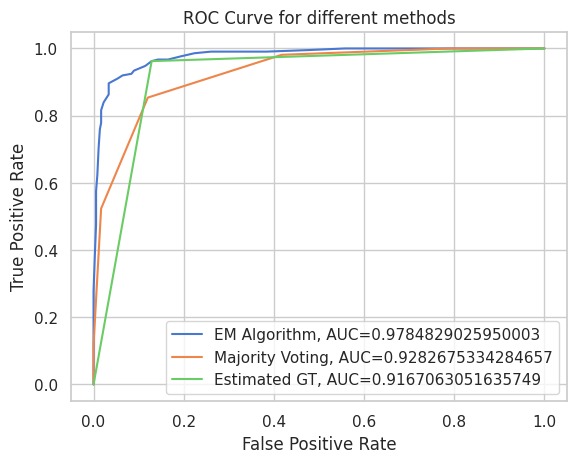

In [ ]:
#fpr, tpr, thres = roc_curve(true_labels, true_labels)
#auc = metrics.roc_auc_score(true_labels, true_labels)
#plt.plot(fpr,tpr,label="True Labels, AUC="+str(auc))

fpr1, tpr1, thres1 = roc_curve(true_labels, mu_i[:,1])
auc1 = metrics.roc_auc_score(true_labels, mu_i[:,1])
plt.plot(fpr1,tpr1,label="EM Algorithm, AUC="+str(auc1))

fpr2, tpr2, thres2 = roc_curve(true_labels, maj_label1)
auc2 = metrics.roc_auc_score(true_labels, maj_label1)
plt.plot(fpr2,tpr2,label="Majority Voting, AUC="+str(auc2))

fpr3, tpr3, thres3 = roc_curve(true_labels, estimatedGT)
auc3 = metrics.roc_auc_score(true_labels, estimatedGT)
plt.plot(fpr3,tpr3,label="Estimated GT, AUC="+str(auc3))


plt.legend(loc='lower right')
plt.title("ROC Curve for different methods")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

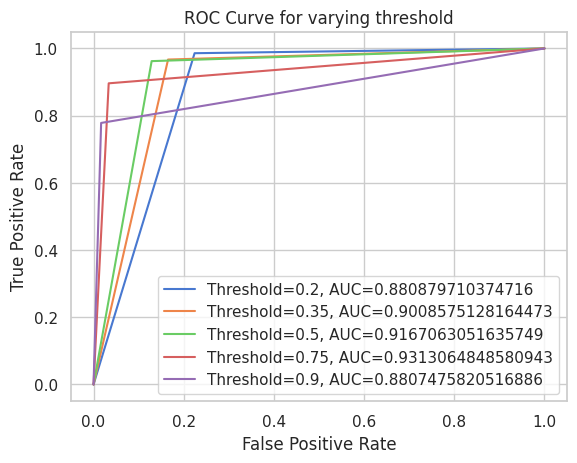

In [ ]:
threshold=[0.2, 0.35, 0.5, 0.75, 0.9]
for t in threshold:
  esti=[]
  for i in mu_i[:,1]:
    if i>=t:
      esti.append(1)
    else:
      esti.append(0)

  fpr_t, tpr_t, thres_t = roc_curve(true_labels, esti)
  auc_t = metrics.roc_auc_score(true_labels, esti)
  plt.plot(fpr_t,tpr_t,label="Threshold="+str(t)+", AUC="+str(auc_t))


plt.legend(loc='lower right')
plt.title("ROC Curve for varying threshold")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#EM Algorithm

In [ ]:
mu_ini=maj_label1
alpha_ini=np.zeros(5)
beta_ini=np.zeros(5)
o=np.ones(n)
w_ini=np.ones(no_of_features)
a_ini=np.zeros(n)
b_ini=np.zeros(n)
p_ini=np.zeros(n)

In [ ]:
mu_em=mu_ini
alpha=alpha_ini
beta=beta_ini
w=w_ini
a=a_ini
b=b_ini
p=p_ini
for iter in range(10):
  for j in range(5):
    alpha[j]=np.sum(np.dot(mu_em,y[:,j]))/(np.sum(mu_em))
    beta[j]=np.sum(np.dot(o-mu_em,o-y[:,j]))/(np.sum(o-mu_em))
  for i in range(n):
    a[i]=1
    b[i]=1
    for j in range(5):
      a[i]=a[i]*(alpha[j]**y[i][j])*((1-alpha[j])**(1-y[i][j]))
      b[i]=b[i]*(beta[j]**y[i][j])*((1-beta[j])**(1-y[i][j]))
      p[i]= 1/(1 + np.exp(-(np.dot(w,X.iloc[i].to_numpy()))))
    mu_em[i]=(a[i]*p[i])/(a[i]*p[i]+b[i]*(1-p[i]))
print(mu_em)
print(alpha, beta)

[1.     0.2743 0.9874 1.     0.7016 0.999  0.9273 0.9893 0.9993 1.
 0.1439 0.9542 0.9997 0.1583 0.9999 1.     0.4124 0.9995 0.8733 0.1036
 0.4113 0.0409 0.9973 0.6112 0.9962 0.9993 0.998  0.4486 0.9981 0.1581
 0.999  0.9999 0.9979 0.9986 0.9935 0.993  0.9788 0.0007 0.0047 0.8936
 0.013  0.9728 0.9999 0.966  0.9049 0.9951 0.188  0.9951 0.1594 0.1484
 0.0113 0.0236 0.0397 0.7295 0.1703 0.2203 0.9131 0.975  0.0025 0.7494
 0.4205 0.8221 0.9997 0.3296 0.9935 0.971  0.8406 0.0594 1.     0.015
 0.1284 0.9717 0.9995 0.2847 0.0357 0.4282 0.1077 0.9933 1.     0.1414
 0.9463 0.9894 1.     0.9949 0.4325 0.8321 0.3096 0.9873 0.8879 0.3323
 0.2349 0.3795 0.0006 0.0923 0.8106 0.9371 0.0361 0.0692 0.252  0.5729
 0.2973 0.6872 0.0347 0.6646 0.16   0.9998 0.9142 0.0703 1.     0.9521
 0.4258 0.9226 0.9997 0.8303 0.9491 0.6461 0.3482 0.9964 1.     0.5728
 0.177  0.9537 1.     0.3335 0.054  0.0248 0.731  0.0981 0.7778 0.9931
 0.6299 0.7235 0.5874 0.073  0.8625 0.2802 0.0198 0.014  0.8918 0.0223
 0.0324 0.2

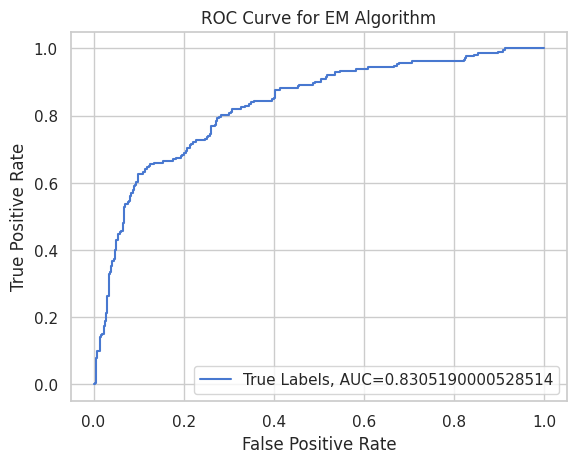

In [ ]:
fpr4, tpr4, thres4 = roc_curve(true_labels, mu_em)
auc4 = metrics.roc_auc_score(true_labels, mu_em)
plt.plot(fpr4, tpr4, label="True Labels, AUC="+str(auc4))
plt.legend(loc='lower right')
plt.title("ROC Curve for EM Algorithm")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
mu_em=mu_ini
alpha=alpha_ini
beta=beta_ini
w=w_ini
a=a_ini
b=b_ini
p=p_ini
grad=np.zeros(no_of_features)
hess=np.zeros((no_of_features, no_of_features))
for iter in range(10):
  for j in range(5):
    alpha[j]=np.sum(np.dot(mu_em,y[:,j]))/(np.sum(mu_em))
    beta[j]=np.sum(np.dot(o-mu_em,o-y[:,j]))/(np.sum(o-mu_em))
  step_length=0.1
  for ii in range(n):
    grad=grad+(mu_em[ii]-p[ii])*X.iloc[ii].to_numpy()
    hess=hess-(p[ii])*(1-p[ii])*X.iloc[ii].to_numpy()@(X.iloc[ii].to_numpy()).T
  for t in range(5):
    w=w-step_length*np.linalg.pinv(hess)@grad.T
  for i in range(n):
    a[i]=1
    b[i]=1
    for j in range(5):
      a[i]=a[i]*(alpha[j]**y[i][j])*((1-alpha[j])**(1-y[i][j]))
      b[i]=b[i]*(beta[j]**y[i][j])*((1-beta[j])**(1-y[i][j]))
      p[i]= 1/(1 + np.exp(-(np.dot(w,X.iloc[i].to_numpy()))))
    mu_em[i]=(a[i]*p[i])/(a[i]*p[i]+b[i]*(1-p[i]))
print(mu_em)
print(alpha, beta)

[1.     0.2733 0.9853 1.     0.6923 0.9987 0.9244 0.9875 0.9991 1.
 0.148  0.9504 0.9996 0.1623 0.9999 1.     0.411  0.9994 0.8658 0.1101
 0.418  0.0453 0.9967 0.6024 0.9954 0.9992 0.9975 0.4419 0.9977 0.1604
 0.9988 0.9998 0.9975 0.9983 0.9923 0.9918 0.9762 0.0009 0.0055 0.8848
 0.0142 0.9695 0.9999 0.9621 0.8988 0.9942 0.2024 0.9942 0.1666 0.1583
 0.013  0.027  0.0443 0.7177 0.1751 0.2354 0.904  0.9715 0.003  0.7501
 0.4349 0.8209 0.9996 0.3428 0.9923 0.9672 0.8392 0.067  1.     0.0172
 0.1325 0.9699 0.9993 0.2851 0.04   0.4351 0.1159 0.992  1.     0.1505
 0.9447 0.9883 1.     0.9941 0.4467 0.8193 0.308  0.9856 0.887  0.3313
 0.2503 0.3791 0.0007 0.101  0.7973 0.9304 0.0405 0.0749 0.2638 0.5633
 0.3008 0.6931 0.0393 0.6681 0.1689 0.9998 0.9118 0.077  1.     0.9504
 0.4317 0.9211 0.9996 0.8255 0.9457 0.6536 0.3583 0.9957 1.     0.5742
 0.1888 0.9506 1.     0.3467 0.0603 0.0286 0.7231 0.1041 0.7802 0.9919
 0.6379 0.717  0.5776 0.0807 0.8556 0.2825 0.0228 0.0161 0.8854 0.0258
 0.0369 0.

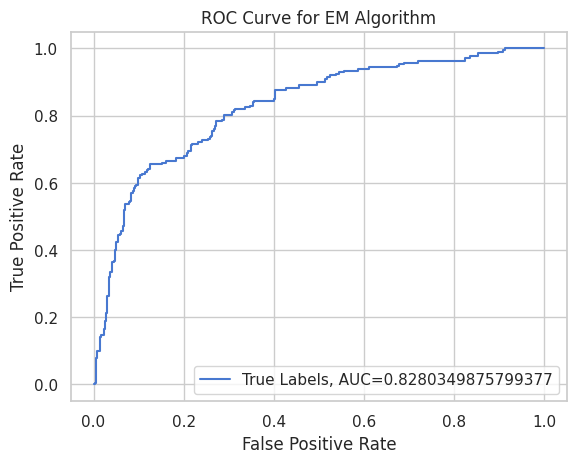

In [ ]:
fpr4, tpr4, thres4 = roc_curve(true_labels, mu_em)
auc4 = metrics.roc_auc_score(true_labels, mu_em)
plt.plot(fpr4, tpr4, label="True Labels, AUC="+str(auc4))
plt.legend(loc='lower right')
plt.title("ROC Curve for EM Algorithm")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
mu_em=mu_ini
alpha=alpha_ini
beta=beta_ini
w=w_ini
a=a_ini
b=b_ini
p=p_ini
for iter in range(10):
  for j in range(5):
    alpha[j]=np.sum(np.dot(mu_em,y[:,j]))/(np.sum(mu_em))
    beta[j]=np.sum(np.dot(o-mu_em,o-y[:,j]))/(np.sum(o-mu_em))
  step_length=0.1
  for t in range(5):
    grad=np.zeros(no_of_features)
    hess=np.zeros((no_of_features, no_of_features))
    for ii in range(n):
      grad=grad+(mu_em[ii]-p[ii])*X.iloc[ii].to_numpy()
      hess=hess-(p[ii])*(1-p[ii])*X.iloc[ii].to_numpy()@(X.iloc[ii].to_numpy()).T
    w=w-step_length*np.linalg.pinv(hess)@grad.T
  for i in range(n):
    a[i]=1
    b[i]=1
    for j in range(5):
      a[i]=a[i]*(alpha[j]**y[i][j])*((1-alpha[j])**(1-y[i][j]))
      b[i]=b[i]*(beta[j]**y[i][j])*((1-beta[j])**(1-y[i][j]))
      p[i]= 1/(1 + np.exp(-(np.dot(w,X.iloc[i].to_numpy()))))
    mu_em[i]=(a[i]*p[i])/(a[i]*p[i]+b[i]*(1-p[i]))
print(mu_em)
print(alpha, beta)

[1.     0.2733 0.9853 1.     0.6922 0.9987 0.9244 0.9875 0.9991 1.
 0.148  0.9504 0.9996 0.1624 0.9999 1.     0.411  0.9994 0.8657 0.1102
 0.4181 0.0453 0.9967 0.6024 0.9954 0.9992 0.9975 0.4419 0.9977 0.1604
 0.9988 0.9998 0.9975 0.9983 0.9923 0.9917 0.9762 0.0009 0.0055 0.8847
 0.0142 0.9695 0.9999 0.962  0.8988 0.9942 0.2025 0.9941 0.1666 0.1584
 0.013  0.0271 0.0443 0.7177 0.1752 0.2355 0.9039 0.9715 0.003  0.7501
 0.435  0.8209 0.9996 0.3429 0.9923 0.9671 0.8392 0.067  1.     0.0173
 0.1326 0.9699 0.9993 0.2851 0.0401 0.4352 0.116  0.992  1.     0.1506
 0.9447 0.9883 1.     0.9941 0.4468 0.8192 0.308  0.9856 0.887  0.3313
 0.2504 0.3791 0.0007 0.1011 0.7972 0.9304 0.0405 0.075  0.2639 0.5633
 0.3009 0.6931 0.0394 0.6681 0.1689 0.9998 0.9118 0.077  1.     0.9504
 0.4318 0.9211 0.9996 0.8254 0.9457 0.6536 0.3584 0.9957 1.     0.5742
 0.1888 0.9506 1.     0.3468 0.0604 0.0286 0.7231 0.1042 0.7802 0.9918
 0.638  0.7169 0.5775 0.0807 0.8555 0.2825 0.0229 0.0162 0.8853 0.0258
 0.037  0.

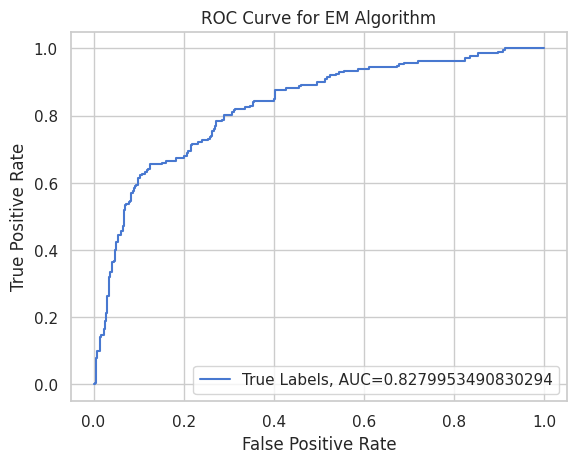

In [ ]:
fpr4, tpr4, thres4 = roc_curve(true_labels, mu_em)
auc4 = metrics.roc_auc_score(true_labels, mu_em)
plt.plot(fpr4, tpr4, label="True Labels, AUC="+str(auc4))
plt.legend(loc='lower right')
plt.title("ROC Curve for EM Algorithm")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#Bayesian Approach

In [ ]:
a_j_1=np.zeros(5)
a_j_2=np.zeros(5)
b_j_1=np.zeros(5)
b_j_2=np.zeros(5)
mean_a=np.zeros(5)
var_a=np.zeros(5)
mean_b=np.zeros(5)
var_b=np.zeros(5)

In [ ]:
f=final.groupby('True Label')

In [ ]:
kkk=f.get_group(1).to_numpy().T[9:14].T

In [ ]:
kkk

array([[1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 0.],
       ...,
       [1., 1., 0., 1., 1.],
       [0., 1., 1., 1., 1.],
       [1., 1., 1., 0., 0.]])

In [ ]:
kk=f.get_group(0).to_numpy().T[9:14]

In [ ]:
kk

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [ ]:
kk_dash=kk

In [ ]:
kk_dash=np.where(kk==0,1,0).T

In [ ]:
kk_dash

array([[1, 0, 0, 0, 1],
       [1, 0, 0, 1, 1],
       [1, 0, 0, 1, 1],
       ...,
       [1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 0]])

In [ ]:
kkk.shape

(212, 5)

In [ ]:
for j in range(5):
  mean_a[j]=np.mean(kkk[:,j])
  var_a[j]=np.var(kkk[:,j])
  mean_b[j]=np.mean(kk_dash[:,j])
  var_b[j]=np.var(kk_dash[:,j])

  a_j_1[j]=(-(mean_a[j]**3)+(mean_a[j]**2)-(mean_a[j]*var_a[j]))/(var_a[j])
  a_j_2[j]=a_j_1[j]*(1-mean_a[j])/(mean_a[j])
  b_j_1[j]=(-(mean_b[j]**3)+(mean_b[j]**2)-(mean_b[j]*var_b[j]))/(var_b[j])
  b_j_2[j]=b_j_1[j]*(1-mean_b[j])/(mean_b[j])

In [ ]:
mu_b=mu_ini
alpha=alpha_ini
beta=beta_ini
w=w_ini
a=a_ini
b=b_ini
p=p_ini
for iter in range(10):
  for j in range(5):
    alpha[j]=(a_j_1[j] - 1 + np.sum(np.dot(mu_b,y[:,j])))/(a_j_1[j] + a_j_2[j] - 2 + np.sum(mu_b))
    beta[j]=(b_j_1[j] - 1 + np.sum(np.dot(o-mu_b,o-y[:,j])))/(b_j_1[j] + b_j_2[j] - 2 + np.sum(o-mu_b))
    #print(np.sum(np.dot(mu_b,y[:,j])))
    #print(np.sum(mu_b))
    #print(alpha[j],beta[j])
  for i in range(n):
    a[i]=1
    b[i]=1
    for j in range(5):
      a[i]=a[i]*(alpha[j]**y[i][j])*((1-alpha[j])**(1-y[i][j]))
      b[i]=b[i]*(beta[j]**y[i][j])*((1-beta[j])**(1-y[i][j]))
      p[i]= 1/(1 + np.exp(-(np.dot(w,X.iloc[i].to_numpy()))))
    mu_b[i]=(a[i]*p[i])/(a[i]*p[i]+b[i]*(1-p[i]))
print(mu_b)
print(alpha,beta)

[1.     0.2728 0.9873 1.     0.7007 0.999  0.9281 0.9892 0.9993 1.
 0.1434 0.9545 0.9997 0.1578 0.9999 1.     0.4116 0.9995 0.8731 0.1042
 0.4135 0.0412 0.9973 0.6102 0.9962 0.9993 0.998  0.4467 0.9981 0.1572
 0.999  0.9999 0.9979 0.9986 0.9935 0.9929 0.9788 0.0007 0.0047 0.8929
 0.0129 0.9727 0.9999 0.9658 0.9049 0.9951 0.1909 0.9951 0.1602 0.15
 0.0114 0.0239 0.0402 0.7281 0.1701 0.2235 0.9123 0.9749 0.0025 0.7521
 0.425  0.8243 0.9997 0.3331 0.9935 0.9708 0.8427 0.0604 1.     0.0151
 0.128  0.9721 0.9995 0.2838 0.0361 0.4306 0.1088 0.9932 1.     0.1428
 0.9472 0.9895 1.     0.9949 0.4371 0.8306 0.3081 0.9873 0.8898 0.3313
 0.2383 0.3788 0.0006 0.0935 0.809  0.9366 0.0365 0.0698 0.2544 0.5711
 0.2979 0.6912 0.0352 0.6679 0.1612 0.9998 0.9154 0.0711 1.     0.9529
 0.4279 0.9239 0.9997 0.8315 0.9495 0.6504 0.3511 0.9964 1.     0.5741
 0.1791 0.9541 1.     0.337  0.0548 0.0252 0.7308 0.0986 0.7809 0.9931
 0.6342 0.7234 0.5857 0.0741 0.8624 0.2795 0.0201 0.0141 0.8918 0.0227
 0.0329 0.27

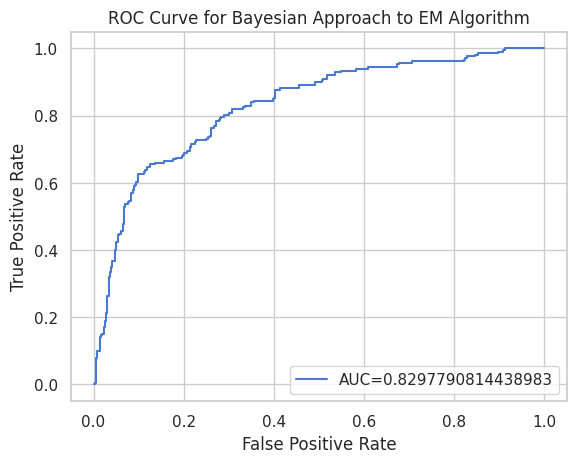

In [ ]:
fpr5, tpr5, thres5 = roc_curve(true_labels, mu_b)
auc5 = metrics.roc_auc_score(true_labels, mu_b)
plt.plot(fpr5,tpr5,label="AUC="+str(auc5))

plt.legend(loc='lower right')
plt.title("ROC Curve for Bayesian Approach to EM Algorithm")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
mu_b=mu_ini
alpha=alpha_ini
beta=beta_ini
w=w_ini
a=a_ini
b=b_ini
p=p_ini
grad=np.zeros(no_of_features)
hess=np.zeros((no_of_features, no_of_features))
cov=np.cov(X.T)
for iter in range(30):
  for j in range(5):
    alpha[j]=(a_j_1[j] - 1 + np.sum(np.dot(mu_b,y[:,j])))/(a_j_1[j] + a_j_2[j] - 2 + np.sum(mu_b))
    beta[j]=(b_j_1[j] - 1 + np.sum(np.dot(o-mu_b,o-y[:,j])))/(b_j_1[j] + b_j_2[j] - 2 + np.sum(o-mu_b))
  step_length=0.01
  for ii in range(n):
    grad=grad+(mu_b[ii]-p[ii])*X.iloc[i].to_numpy()
    hess=hess-(p[ii])*(1-p[ii])*X.iloc[i].to_numpy()@(X.iloc[i].to_numpy()).T
  grad=grad-np.linalg.inv(cov)@w
  hess=hess-np.linalg.inv(cov)
  for t in range(5):
    w=w-step_length*np.linalg.inv(hess)@grad.T
  for i in range(n):
    a[i]=1
    b[i]=1
    for j in range(5):
      a[i]=a[i]*(alpha[j]**y[i][j])*((1-alpha[j])**(1-y[i][j]))
      b[i]=b[i]*(beta[j]**y[i][j])*((1-beta[j])**(1-y[i][j]))
      p[i]= 1/(1 + np.exp(-(np.dot(w,X.iloc[i].to_numpy()))))
    mu_b[i]=(a[i]*p[i])/(a[i]*p[i]+b[i]*(1-p[i]))
print(mu_b)
print(alpha, beta)

[0.     0.0002 0.8593 0.0003 0.     0.     0.5635 0.0252 0.9506 0.9909
 1.     0.048  1.     1.     0.6538 1.     0.888  0.0001 0.9099 0.
 0.     0.     0.     1.     0.0212 0.     0.9998 0.0059 1.     0.
 1.     0.009  0.9991 1.     0.0078 1.     0.9999 0.9918 1.     0.0678
 1.     0.001  1.     0.9522 1.     0.     0.1724 0.     0.     1.
 1.     0.0188 0.9956 0.0008 1.     0.9999 0.     1.     1.     0.
 0.0003 0.9808 0.007  0.0001 0.9995 1.     0.9984 0.9817 0.     0.0001
 0.9998 0.     1.     0.     0.013  0.0301 0.     0.     0.985  0.302
 0.9616 0.     0.0054 1.     0.0002 0.0042 0.9999 1.     1.     0.
 1.     1.     0.     0.3409 0.0001 1.     0.251  0.9236 0.     0.0374
 1.     0.     1.     0.0356 0.9988 0.     0.     0.9988 0.     0.9023
 0.     0.9144 0.0036 0.4893 0.     0.9997 0.     0.     0.0045 1.
 0.     0.     0.     0.     0.0006 0.1791 1.     0.9966 0.     1.
 0.     0.001  1.     0.     0.9987 1.     0.     0.0002 0.     0.
 0.     0.0004 0.0007 0.0014 0.0002 0. 

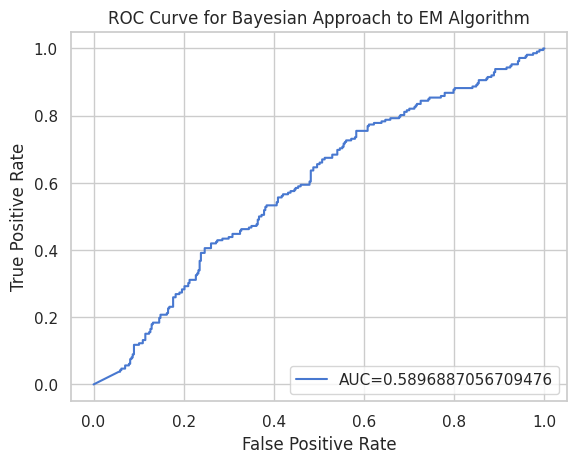

In [ ]:
fpr5, tpr5, thres5 = roc_curve(true_labels, mu_b)
auc5 = metrics.roc_auc_score(true_labels, mu_b)
plt.plot(fpr5,tpr5,label="AUC="+str(auc5))

plt.legend(loc='lower right')
plt.title("ROC Curve for Bayesian Approach to EM Algorithm")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
mu_b=mu_ini
alpha=alpha_ini
beta=beta_ini
w=w_ini
a=a_ini
b=b_ini
p=p_ini
grad=np.zeros(no_of_features)
hess=np.zeros((no_of_features, no_of_features))
cov=np.cov(X.T)
for iter in range(10):
  for j in range(5):
    alpha[j]=(a_j_1[j] - 1 + np.sum(np.dot(mu_b,y[:,j])))/(a_j_1[j] + a_j_2[j] - 2 + np.sum(mu_b))
    beta[j]=(b_j_1[j] - 1 + np.sum(np.dot(o-mu_b,o-y[:,j])))/(b_j_1[j] + b_j_2[j] - 2 + np.sum(o-mu_b))
  step_length=0.1
  for t in range(5):
    grad=np.zeros(no_of_features)
    hess=np.zeros((no_of_features, no_of_features))
    for ii in range(n):
      grad=grad+(mu_b[ii]-p[ii])*X.iloc[ii].to_numpy()
      hess=hess-(p[ii])*(1-p[ii])*X.iloc[ii].to_numpy()@(X.iloc[ii].to_numpy()).T
    grad=grad-np.linalg.inv(cov)@w
    hess=hess-np.linalg.inv(cov)
    w=w-step_length*np.linalg.inv(hess)@grad.T
  for i in range(n):
    a[i]=1
    b[i]=1
    for j in range(5):
      a[i]=a[i]*(alpha[j]**y[i][j])*((1-alpha[j])**(1-y[i][j]))
      b[i]=b[i]*(beta[j]**y[i][j])*((1-beta[j])**(1-y[i][j]))
      p[i]= 1/(1 + np.exp(-(np.dot(w,X.iloc[i].to_numpy()))))
    mu_b[i]=(a[i]*p[i])/(a[i]*p[i]+b[i]*(1-p[i]))
print(mu_b)
print(alpha, beta)

[1.     0.     0.0002 1.     0.     1.     0.0002 1.     1.     1.
 0.0001 0.9595 0.9999 0.     1.     1.     0.0222 1.     0.     0.0288
 0.9984 0.9999 1.     0.     0.8829 1.     1.     0.     0.9963 0.0009
 0.0397 1.     0.2487 0.1382 0.9999 0.0886 0.9899 0.     0.     0.9988
 0.     1.     0.9763 1.     0.9872 0.1363 0.9995 1.     0.8597 0.0007
 0.0008 0.0147 0.1547 0.0004 0.0003 0.2888 0.0003 0.9998 0.     1.
 1.     1.     1.     1.     1.     0.9769 1.     0.0079 1.     0.0005
 0.     1.     0.9997 0.9949 0.0581 0.     0.9373 0.9976 1.     0.2266
 1.     1.     0.     0.1516 0.9356 0.0009 0.0003 0.0003 0.9977 0.7966
 0.0004 0.0007 0.     0.0019 0.2448 0.     0.6776 0.9992 0.9997 0.8646
 0.001  1.     0.0011 0.9991 0.9826 1.     0.9999 0.0937 0.9297 0.9999
 1.     0.9999 1.     1.     1.     0.9578 1.     1.     1.     0.
 0.9967 0.0099 0.0025 0.9277 0.008  0.0021 0.2864 0.     0.782  0.
 0.9999 0.0036 0.0008 0.0002 0.     0.2155 0.0427 0.0237 0.5462 0.2742
 0.9984 0.0143 0.997  

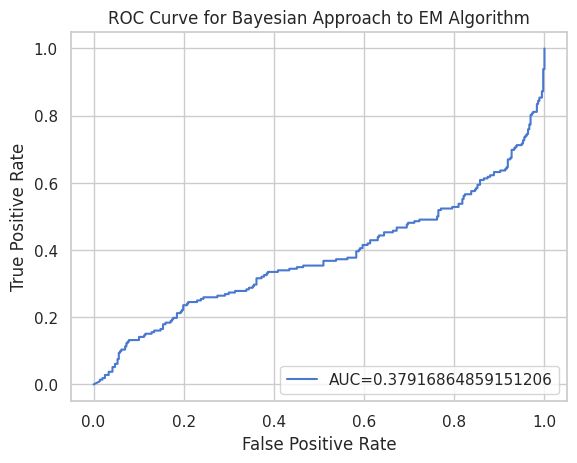

In [ ]:
fpr5, tpr5, thres5 = roc_curve(true_labels, mu_b)
auc5 = metrics.roc_auc_score(true_labels, mu_b)
plt.plot(fpr5,tpr5,label="AUC="+str(auc5))

plt.legend(loc='lower right')
plt.title("ROC Curve for Bayesian Approach to EM Algorithm")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
for j in range(5):
  mean_a[j]=0.7
  var_a[j]=0.2
  mean_b[j]=0.7
  var_b[j]=0.2

  a_j_1[j]=(-(mean_a[j]**3)+(mean_a[j]**2)-(mean_a[j]*var_a[j]))/var_a[j]
  a_j_2[j]=a_j_1[j]*(1-mean_a[j])/mean_a[j]
  b_j_1[j]=(-(mean_b[j]**3)+(mean_b[j]**2)-(mean_b[j]*var_b[j]))/var_b[j]
  b_j_2[j]=b_j_1[j]*(1-mean_b[j])/mean_b[j]

In [ ]:
a_j_1

array([0.035, 0.035, 0.035, 0.035, 0.035])

In [ ]:
b_j_2

array([0.015, 0.015, 0.015, 0.015, 0.015])

In [ ]:
mu_b=mu_ini
alpha=alpha_ini
beta=beta_ini
w=w_ini
a=a_ini
b=b_ini
p=p_ini
for iter in range(10):
  for j in range(5):
    alpha[j]=(a_j_1[j] - 1 + np.sum(np.dot(mu_b,y[:,j])))/(a_j_1[j] + a_j_2[j] - 2 + np.sum(mu_b))
    beta[j]=(b_j_1[j] - 1 + np.sum(np.dot(o-mu_b,o-y[:,j])))/(b_j_1[j] + b_j_2[j] - 2 + np.sum(o-mu_b))
  for i in range(n):
    a[i]=1
    b[i]=1
    for j in range(5):
      a[i]=a[i]*(alpha[j]**y[i][j])*((1-alpha[j])**(1-y[i][j]))
      b[i]=b[i]*(beta[j]**y[i][j])*((1-beta[j])**(1-y[i][j]))
      p[i]= 1/(1 + np.exp(-(np.dot(w,X.iloc[i].to_numpy()))))
    mu_b[i]=(a[i]*p[i])/(a[i]*p[i]+b[i]*(1-p[i]))
print(mu_b)
print(alpha,beta)

[1.     0.2729 0.9873 1.     0.7007 0.999  0.9281 0.9892 0.9993 1.
 0.1434 0.9545 0.9997 0.1579 0.9999 1.     0.4116 0.9995 0.8731 0.1042
 0.4135 0.0412 0.9973 0.6102 0.9962 0.9993 0.998  0.4467 0.9981 0.1572
 0.999  0.9999 0.9979 0.9986 0.9935 0.9929 0.9788 0.0007 0.0047 0.893
 0.0129 0.9728 0.9999 0.9659 0.9049 0.9951 0.1908 0.9951 0.1602 0.15
 0.0114 0.0239 0.0402 0.7281 0.1701 0.2235 0.9123 0.9749 0.0025 0.7521
 0.425  0.8243 0.9997 0.333  0.9935 0.9708 0.8427 0.0604 1.     0.0151
 0.128  0.9721 0.9995 0.2839 0.0361 0.4306 0.1088 0.9932 1.     0.1427
 0.9472 0.9895 1.     0.9949 0.437  0.8306 0.3082 0.9873 0.8897 0.3313
 0.2382 0.3788 0.0006 0.0935 0.8091 0.9367 0.0365 0.0698 0.2544 0.5712
 0.2979 0.6912 0.0352 0.6679 0.1612 0.9998 0.9154 0.0711 1.     0.9529
 0.4279 0.9239 0.9997 0.8315 0.9495 0.6503 0.351  0.9964 1.     0.5741
 0.1791 0.9541 1.     0.337  0.0548 0.0252 0.7308 0.0986 0.7809 0.9931
 0.6341 0.7234 0.5858 0.074  0.8625 0.2796 0.0201 0.0141 0.8918 0.0227
 0.0329 0.276

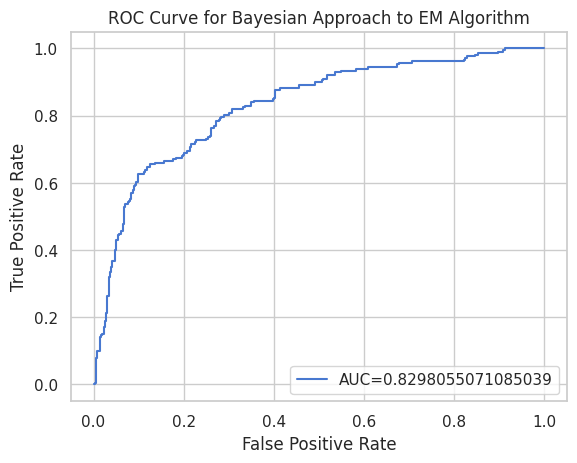

In [ ]:
fpr5, tpr5, thres5 = roc_curve(true_labels, mu_b)
auc5 = metrics.roc_auc_score(true_labels, mu_b)
plt.plot(fpr5,tpr5,label="AUC="+str(auc5))

plt.legend(loc='lower right')
plt.title("ROC Curve for Bayesian Approach to EM Algorithm")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
mu_b=mu_ini
alpha=alpha_ini
beta=beta_ini
w=w_ini
a=a_ini
b=b_ini
p=p_ini
grad=np.zeros(no_of_features)
hess=np.zeros((no_of_features, no_of_features))
cov=np.cov(X.T)
for iter in range(10):
  for j in range(5):
    alpha[j]=(a_j_1[j] - 1 + np.sum(np.dot(mu_b,y[:,j])))/(a_j_1[j] + a_j_2[j] - 2 + np.sum(mu_b))
    beta[j]=(b_j_1[j] - 1 + np.sum(np.dot(o-mu_b,o-y[:,j])))/(b_j_1[j] + b_j_2[j] - 2 + np.sum(o-mu_b))
  step_length=0.1
  for ii in range(n):
    grad=grad+(mu_b[ii]-p[ii])*X.iloc[i].to_numpy()
    hess=hess-(p[ii])*(1-p[ii])*X.iloc[i].to_numpy()@(X.iloc[i].to_numpy()).T
  grad=grad-np.linalg.inv(cov)@w
  hess=hess-np.linalg.inv(cov)
  for t in range(5):
    w=w-step_length*np.linalg.inv(hess)@grad.T
  for i in range(n):
    a[i]=1
    b[i]=1
    for j in range(5):
      a[i]=a[i]*(alpha[j]**y[i][j])*((1-alpha[j])**(1-y[i][j]))
      b[i]=b[i]*(beta[j]**y[i][j])*((1-beta[j])**(1-y[i][j]))
      p[i]= 1/(1 + np.exp(-(np.dot(w,X.iloc[i].to_numpy()))))
    mu_b[i]=(a[i]*p[i])/(a[i]*p[i]+b[i]*(1-p[i]))
#print(mu_b)
#print(alpha, beta)

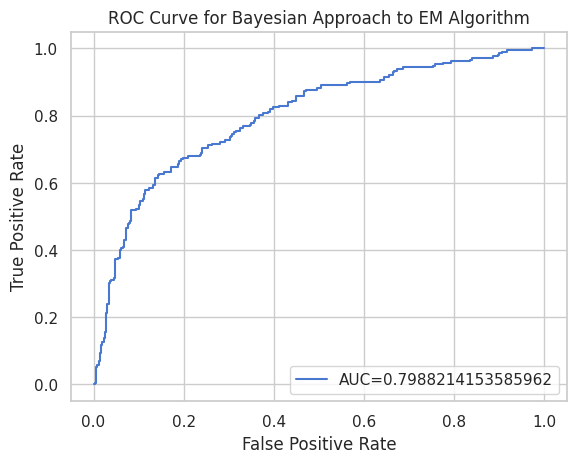

In [ ]:
fpr5, tpr5, thres5 = roc_curve(true_labels, mu_b)
auc5 = metrics.roc_auc_score(true_labels, mu_b)
plt.plot(fpr5,tpr5,label="AUC="+str(auc5))

plt.legend(loc='lower right')
plt.title("ROC Curve for Bayesian Approach to EM Algorithm")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
mu_b=mu_ini
alpha=alpha_ini
beta=beta_ini
w=w_ini
a=a_ini
b=b_ini
p=p_ini
grad=np.zeros(no_of_features)
hess=np.zeros((no_of_features, no_of_features))
cov=np.cov(X.T)
for iter in range(10):
  for j in range(5):
    alpha[j]=(a_j_1[j] - 1 + np.sum(np.dot(mu_b,y[:,j])))/(a_j_1[j] + a_j_2[j] - 2 + np.sum(mu_b))
    beta[j]=(b_j_1[j] - 1 + np.sum(np.dot(o-mu_b,o-y[:,j])))/(b_j_1[j] + b_j_2[j] - 2 + np.sum(o-mu_b))
  step_length=0.1
  for t in range(5):
    grad=np.zeros(no_of_features)
    hess=np.zeros((no_of_features, no_of_features))
    for ii in range(n):
      grad=grad+(mu_b[ii]-p[ii])*X.iloc[ii].to_numpy()
      hess=hess-(p[ii])*(1-p[ii])*X.iloc[ii].to_numpy()@(X.iloc[ii].to_numpy()).T
    grad=grad-np.linalg.inv(cov)@w
    hess=hess-np.linalg.inv(cov)
    w=w-step_length*np.linalg.inv(hess)@grad.T
  for i in range(n):
    a[i]=1
    b[i]=1
    for j in range(5):
      a[i]=a[i]*(alpha[j]**y[i][j])*((1-alpha[j])**(1-y[i][j]))
      b[i]=b[i]*(beta[j]**y[i][j])*((1-beta[j])**(1-y[i][j]))
      p[i]= 1/(1 + np.exp(-(np.dot(w,X.iloc[i].to_numpy()))))
    mu_b[i]=(a[i]*p[i])/(a[i]*p[i]+b[i]*(1-p[i]))
print(mu_b)
print(alpha, beta)

[1.     0.     0.0002 1.     0.     1.     0.0003 1.     1.     1.
 0.0001 0.9594 0.9999 0.     1.     1.     0.0223 1.     0.     0.0289
 0.9984 0.9999 1.     0.     0.8822 1.     1.     0.     0.9963 0.0009
 0.0395 1.     0.2473 0.1379 0.9999 0.0886 0.9898 0.     0.     0.9988
 0.     1.     0.9761 1.     0.9872 0.1355 0.9995 1.     0.8594 0.0007
 0.0008 0.0148 0.1555 0.0004 0.0003 0.29   0.0003 0.9998 0.     1.
 1.     1.     1.     1.     1.     0.9768 1.     0.008  1.     0.0005
 0.     1.     0.9997 0.9949 0.0584 0.     0.9372 0.9975 1.     0.2272
 1.     1.     0.     0.1514 0.9357 0.0009 0.0003 0.0003 0.9977 0.7962
 0.0004 0.0007 0.     0.0019 0.2437 0.     0.6786 0.9992 0.9997 0.8642
 0.001  1.     0.0011 0.9991 0.9826 1.     0.9999 0.0944 0.9284 0.9999
 1.     0.9999 1.     1.     1.     0.9578 1.     1.     1.     0.
 0.9967 0.0099 0.0025 0.9276 0.0081 0.0021 0.287  0.     0.7817 0.
 0.9999 0.0036 0.0008 0.0002 0.     0.2158 0.0428 0.0238 0.5449 0.2745
 0.9984 0.0143 0.997  

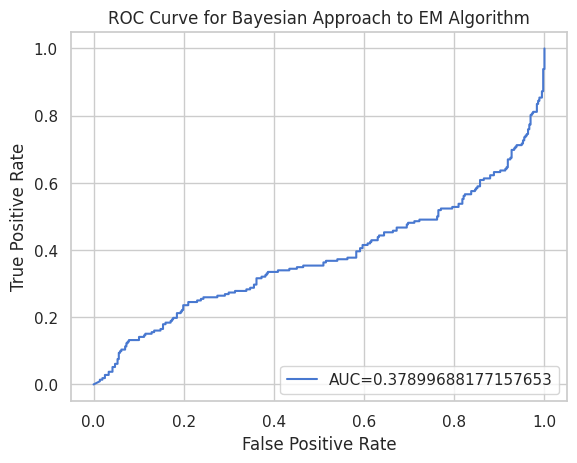

In [ ]:
fpr5, tpr5, thres5 = roc_curve(true_labels, mu_b)
auc5 = metrics.roc_auc_score(true_labels, mu_b)
plt.plot(fpr5,tpr5,label="AUC="+str(auc5))

plt.legend(loc='lower right')
plt.title("ROC Curve for Bayesian Approach to EM Algorithm")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#Obtaining ground truth with no features

In [ ]:
p_1=(-(np.mean(true_labels)**3)+(np.mean(true_labels)**2)-(np.mean(true_labels)*np.var(true_labels)))/np.var(true_labels)
p_2=p_1*(1-np.mean(true_labels))/np.mean(true_labels)

In [ ]:
mu_no_features=mu_ini
alpha=alpha_ini
beta=beta_ini
w=w_ini
a=a_ini
b=b_ini
p=p_ini
for iter in range(10):
  p = (p_1 - 1 + np.sum(mu_no_features))/(p_1 + p_2 - 2 + n)
  for i in range(n):
    a[i]=1
    b[i]=1
    for j in range(5):
      a[i]=a[i]*(alpha[j]**y[i][j])*((1-alpha[j])**(1-y[i][j]))
      b[i]=b[i]*(beta[j]**y[i][j])*((1-beta[j])**(1-y[i][j]))
    mu_no_features[i]=(a[i]*p)/(a[i]*p+b[i]*(1-p))
print(mu_no_features)
print(alpha,beta)

[0.5687 0.3327 0.3648 0.3518 0.4408 0.3518 0.8043 0.3518 0.2555 0.4759
 0.4548 0.6083 0.5039 0.4548 0.3327 0.4408 0.4759 0.3648 0.4897 0.6415
 0.7221 0.7221 0.3648 0.3777 0.4759 0.4685 0.2555 0.3327 0.3327 0.3518
 0.4548 0.3518 0.3648 0.2555 0.3518 0.4408 0.5039 0.4548 0.7389 0.3648
 0.3518 0.4759 0.4759 0.4548 0.5687 0.3518 0.879  0.3518 0.6284 0.7599
 0.6542 0.8128 0.7331 0.3518 0.4897 0.879  0.2555 0.3518 0.7221 0.8128
 0.879  0.8128 0.6163 0.8334 0.4408 0.3648 0.8213 0.879  0.7389 0.7494
 0.4548 0.8128 0.3648 0.3777 0.7599 0.7389 0.7331 0.3327 0.4759 0.7331
 0.879  0.8043 0.4408 0.596  0.879  0.2555 0.3518 0.5687 0.879  0.3777
 0.879  0.4759 0.6542 0.8128 0.2555 0.3518 0.7599 0.6542 0.8043 0.3518
 0.5168 0.879  0.8128 0.8128 0.7221 0.4759 0.8213 0.7494 0.3648 0.879
 0.7106 0.879  0.7494 0.6542 0.7106 0.879  0.7599 0.4759 0.6083 0.6999
 0.8128 0.7221 0.3518 0.8334 0.8128 0.8334 0.4897 0.6083 0.879  0.3518
 0.879  0.5687 0.3518 0.8128 0.5687 0.4759 0.8213 0.7599 0.5687 0.8334
 0.8334

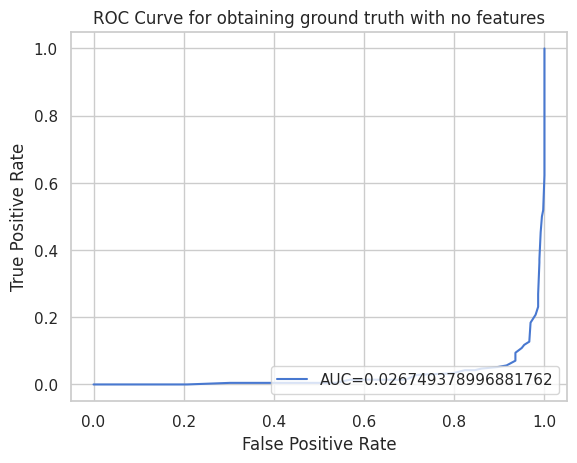

In [ ]:
fpr6, tpr6, thres6 = roc_curve(true_labels, mu_no_features)
auc6 = metrics.roc_auc_score(true_labels, mu_no_features)
plt.plot(fpr6,tpr6,label="AUC="+str(auc6))

plt.legend(loc='lower right')
plt.title("ROC Curve for obtaining ground truth with no features")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#Multiple Labels (DS)

In [ ]:
def em(class_num, dataset_list):

    max_iter = 100
    tolerance = 0.01

    task_num, worker_num, class_num = len(dataset_list), len(dataset_list[0]), class_num
    dataset_tensor = np.zeros((task_num, worker_num, class_num))

    for task_i in range(task_num):
       for worker_j in range(worker_num):
           for predict_label_k in dataset_list[task_i][worker_j]:
                dataset_tensor[task_i][worker_j][predict_label_k] += 1

    task_num, worker_num, _ = dataset_tensor.shape
    predict_label =  dataset_tensor.sum(1) / dataset_tensor.sum(1).sum(1).reshape(-1, 1)

    flag = True
    prev_error_rates, prev_predict_label = None, None
    iter_num = 0


    def _check_condition(marginals_diff, error_rates_diff, iter_num):
        return (marginals_diff < tolerance and error_rates_diff < tolerance) or iter_num > max_iter

    def _m_step(predict_label):
        error_rates = np.zeros((worker_num, class_num, class_num))

        # Equation 2.3
        for i in range(class_num):
            worker_error_rate = np.dot(predict_label[:, i], dataset_tensor.transpose(1, 0 ,2))
            sum_worker_error_rate = worker_error_rate.sum(1)
            sum_worker_error_rate = np.where(sum_worker_error_rate == 0 , -10e9, sum_worker_error_rate)
            error_rates[:, i, :] = worker_error_rate / sum_worker_error_rate.reshape(-1,1)
        return error_rates

    def _e_step(predict_label, error_rates):
        marginal_probability = predict_label.sum(0) / task_num
        next_predict_label = np.zeros([task_num, class_num])

        # Equation 2.5
        for i in range(task_num):
            class_likelihood = _get_class_likelihood(error_rates, dataset_tensor[i])
            next_predict_label[i] = marginal_probability * class_likelihood
            sum_marginal_probability = next_predict_label[i].sum()
            sum_marginal_probability = np.where(sum_marginal_probability == 0 , -10e9, sum_marginal_probability)
            next_predict_label[i] /= sum_marginal_probability
        return next_predict_label

    def _get_likelihood(predict_label, error_rates):
        log_L = 0
        marginal_probability = predict_label.sum(0) / task_num

        # Equation 2.7
        for i in range(task_num):
            class_likelihood = _get_class_likelihood(error_rates, dataset_tensor[i])
            log_L += np.log((marginal_probability * class_likelihood).sum())
        return log_L

    def _get_class_likelihood(error_rates, task_tensor):
        # \sum_{j=1}^J p_{j} \prod_{k=1}^K \prod_{l=1}^J\left(\pi_{j l}^{(k)}\right)^{n_{il}^{(k)}}
        return np.power(error_rates.transpose(0, 2, 1), np.broadcast_to(task_tensor.reshape(worker_num, class_num, 1), (worker_num, class_num, class_num))).transpose(1, 2, 0).prod(0).prod(1)


    while flag:
        error_rates = _m_step(predict_label)
        next_predict_label = _e_step(predict_label, error_rates)
        log_L = _get_likelihood(predict_label, error_rates)

        if iter_num > 0:
           marginal_predict = np.sum(predict_label, 0) / task_num
           prev_marginal_predict = np.sum(prev_predict_label, 0) / task_num
           marginals_diff = np.sum(np.abs(marginal_predict - prev_marginal_predict))
           error_rates_diff = np.sum(np.abs(error_rates - prev_error_rates))

           if _check_condition(marginals_diff, error_rates_diff, iter_num):
                flag = False

        prev_error_rates = error_rates
        prev_predict_label = predict_label
        predict_label = next_predict_label
        iter_num += 1

    worker_reliability = {}
    for i in range(worker_num):
        ie_rates = marginal_predict * error_rates[i, :, :]
        reliability = np.sum(np.diag(ie_rates))
        worker_reliability[i] = reliability

    return marginal_predict, error_rates, worker_reliability, predict_label

In [ ]:
class_num = 4
dataset_list = [
        [[0, 0, 0], [0], [0], [0], [0]],
        [[2, 2, 2], [3], [2], [2], [3]],
        [[0, 0, 1], [1], [0], [1], [1]]
]

marginal_predict, error_rates, worker_reliability, predict_label = em(class_num, dataset_list)

print("\nMarginal Probability:",marginal_predict)
print("\nError Rates:",error_rates)
print("\nWorker Reliability:",worker_reliability)
print("\nEstimate of predicted labels:",predict_label)
print("\nPredicted class for each instance:", np.argmax(predict_label,axis=1))


Marginal Probability: [0.3333 0.3333 0.2381 0.0952]

Error Rates: [[[1.     0.     0.     0.    ]
  [0.6667 0.3333 0.     0.    ]
  [0.     0.     1.     0.    ]
  [0.     0.     1.     0.    ]]

 [[1.     0.     0.     0.    ]
  [0.     1.     0.     0.    ]
  [0.     0.     0.     1.    ]
  [0.     0.     0.     1.    ]]

 [[1.     0.     0.     0.    ]
  [1.     0.     0.     0.    ]
  [0.     0.     1.     0.    ]
  [0.     0.     1.     0.    ]]

 [[1.     0.     0.     0.    ]
  [0.     1.     0.     0.    ]
  [0.     0.     1.     0.    ]
  [0.     0.     1.     0.    ]]

 [[1.     0.     0.     0.    ]
  [0.     1.     0.     0.    ]
  [0.     0.     0.     1.    ]
  [0.     0.     0.     1.    ]]]

Worker Reliability: {0: 0.6825396825396826, 1: 0.7619047619047619, 2: 0.5714285714285714, 3: 0.9047619047619048, 4: 0.7619047619047619}

Estimate of predicted labels: [[1.     0.     0.     0.    ]
 [0.     0.     0.7143 0.2857]
 [0.     1.     0.     0.    ]]

Predicted class for 

In [ ]:
responses =[
                 [[0,0,0], [0], [0], [0], [0]],
                 [[2,2,2], [3], [2], [2], [3]],
                 [[0,0,1], [1], [0], [1], [1]],
                 [[1,1,1], [2], [0], [1], [0]],
                 [[1,1,1], [2], [1], [1], [1]],
                 [[1,1,1], [2], [2], [1], [1]],
                 [[0,1,1], [1], [0], [0], [0]],
                 [[2,2,2], [2], [3], [2], [2]],
                 [[1,1,1], [1], [1], [1], [2]],
                 [[1,2,1], [1], [1], [1], [2]],
                 [[3,3,3], [3], [3], [3], [3]],
                 [[1,1,1], [2], [2], [3], [2]],
                 [[0,0,0], [0], [0], [0], [0]],
                 [[1,1,1], [2], [1], [0], [1]],
                 [[0,1,0], [0], [0], [0], [0]],
                 [[0,0,0], [1], [0], [0], [0]],
                 [[0,0,0], [0], [0], [0], [0]],
                 [[0,0,0], [0], [0], [0], [0]],
                 [[1,1,1], [1], [1], [1], [0]],
                 [[1,1,1], [0], [2], [1], [1]],
                 [[1,1,1], [1], [1], [1], [1]],
                 [[1,1,1], [1], [1], [1], [0]],
                 [[1,1,1], [2], [1], [1], [1]],
                 [[1,1,0], [1], [1], [1], [1]],
                 [[0,0,0], [0], [0], [0], [0]],
                 [[0,0,0], [0], [0], [0], [0]],
                 [[1,2,1], [1], [1], [1], [1]],
                 [[0,0,0], [0], [0], [0], [0]],
                 [[0,0,0], [0], [0], [0], [0]],
                 [[0,0,1], [0], [0], [1], [0]],
                 [[0,0,0], [0], [0], [0], [0]],
                 [[2,2,2], [2], [1], [2], [2]],
                 [[0,0,0], [0], [0], [0], [0]],
                 [[1,1,1], [1], [1], [1], [1]],
                 [[1,1,1], [2], [1], [2], [1]],
                 [[3,2,2], [3], [2], [3], [2]],
                 [[1,1,0], [1], [1], [2], [1]],
                 [[1,2,1], [2], [1], [2], [2]],
                 [[2,2,2], [2], [3], [2], [1]],
                 [[0,0,0], [0], [0], [0], [0]],
                 [[0,0,0], [0], [0], [0], [0]],
                 [[0,1,0], [1], [0], [0], [0]],
                 [[1,2,1], [1], [1], [1], [1]],
                 [[0,1,0], [0], [0], [0], [0]],
                 [[1,1,1], [1], [1], [1], [1]]
                 ]

class_num=4

marginal_predict, error_rates, worker_reliability, predict_label = em(class_num, responses)

print("\nMarginal Probability:",marginal_predict)
print("\nError Rates:",error_rates)
print("\nWorker Reliability:",worker_reliability)
print("\nEstimate of predicted labels:",predict_label)
print("\nPredicted class for each instance:", np.argmax(predict_label,axis=1))


Marginal Probability: [0.3996 0.4221 0.1117 0.0667]

Error Rates: [[[0.8895 0.1105 0.     0.    ]
  [0.0706 0.8764 0.053  0.    ]
  [0.     0.3383 0.6617 0.    ]
  [0.     0.     0.5556 0.4444]]

 [[0.8342 0.1658 0.     0.    ]
  [0.0527 0.6328 0.3145 0.    ]
  [0.     0.     1.     0.    ]
  [0.     0.     0.     1.    ]]

 [[1.     0.     0.     0.    ]
  [0.1063 0.7882 0.1055 0.    ]
  [0.     0.4038 0.1982 0.3979]
  [0.     0.     0.6667 0.3333]]

 [[0.9444 0.0556 0.     0.    ]
  [0.0537 0.8424 0.1037 0.0002]
  [0.     0.     0.8018 0.1982]
  [0.     0.     0.3333 0.6667]]

 [[1.     0.     0.     0.    ]
  [0.159  0.7344 0.1066 0.    ]
  [0.     0.2092 0.7908 0.    ]
  [0.     0.     0.3333 0.6667]]]

Worker Reliability: {0: 0.8288602672369256, 1: 0.7787597065202211, 2: 0.7766007714139209, 3: 0.8669168593447649, 4: 0.8422957720292018}

Estimate of predicted labels: [[1.     0.     0.     0.    ]
 [0.     0.     0.     1.    ]
 [0.0001 0.9999 0.     0.    ]
 [0.     1.     0.    

#Multiple labels based on threshold

In [ ]:
responses =np.array([
                 [0, 0, 0, 0, 0],
                 [2, 3, 2, 2, 3],
                 [1, 1, 0, 1, 1],
                 [1, 2, 0, 1, 0],
                 [1, 2, 1, 1, 1],
                 [1, 2, 2, 1, 1],
                 [1, 1, 0, 0, 0],
                 [2, 2, 3, 2, 2],
                 [1, 1, 1, 1, 2],
                 [1, 1, 1, 1, 2],
                 [3, 3, 3, 3, 3],
                 [1, 2, 2, 3, 2],
                 [0, 0, 0, 0, 0],
                 [1, 2, 1, 0, 1],
                 [0, 0, 0, 0, 0],
                 [0, 1, 0, 0, 0],
                 [0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0],
                 [1, 1, 1, 1, 0],
                 [1, 0, 2, 1, 1],
                 [1, 1, 1, 1, 1],
                 [1, 1, 1, 1, 0],
                 [1, 2, 1, 1, 1],
                 [0, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0],
                 [1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0],
                 [1, 0, 0, 1, 0],
                 [0, 0, 0, 0, 0],
                 [2, 2, 1, 2, 2],
                 [0, 0, 0, 0, 0],
                 [1, 1, 1, 1, 1],
                 [1, 2, 1, 2, 1],
                 [2, 3, 2, 3, 2],
                 [0, 1, 1, 2, 1],
                 [1, 2, 1, 2, 2],
                 [2, 2, 3, 2, 1],
                 [0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0],
                 [0, 1, 0, 0, 0],
                 [1, 1, 1, 1, 1],
                 [0, 0, 0, 0, 0],
                 [1, 1, 1, 1, 1]
                 ])


In [ ]:
n=len(responses)

In [ ]:
X=X[:n]

In [ ]:
responses

array([[0, 0, 0, 0, 0],
       [2, 3, 2, 2, 3],
       [1, 1, 0, 1, 1],
       [1, 2, 0, 1, 0],
       [1, 2, 1, 1, 1],
       [1, 2, 2, 1, 1],
       [1, 1, 0, 0, 0],
       [2, 2, 3, 2, 2],
       [1, 1, 1, 1, 2],
       [1, 1, 1, 1, 2],
       [3, 3, 3, 3, 3],
       [1, 2, 2, 3, 2],
       [0, 0, 0, 0, 0],
       [1, 2, 1, 0, 1],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0],
       [1, 0, 2, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0],
       [1, 2, 1, 1, 1],
       [0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [2, 2, 1, 2, 2],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 2, 1, 2, 1],
       [2, 3, 2, 3, 2],
       [0, 1, 1, 2, 1],
       [1, 2, 1, 2, 2],
       [2, 2, 3, 2, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 0,

In [ ]:
y=np.where(responses>1,responses,0)
y=np.where(responses<1,responses,1)
print(y)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [1 1 0 1 1]
 [1 1 0 1 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 0 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 0 0 0]
 [1 1 1 0 1]
 [0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 1 1 1 0]
 [1 0 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 1]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 1 1 1 1]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 1 0]
 [0 0 0 0 0]
 [1 1 1 1 1]
 [0 0 0 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 0 0 0]
 [1 1 1 1 1]
 [0 0 0 0 0]
 [1 1 1 1 1]]


In [ ]:
mu_ini=y.sum(axis=1)/5
alpha_ini=np.zeros(5)
beta_ini=np.zeros(5)
o=np.ones(n)
w_ini=np.ones(no_of_features)
a_ini=np.zeros(n)
b_ini=np.zeros(n)
p_ini=np.zeros(n)

In [ ]:
mu_em=mu_ini
alpha=alpha_ini
beta=beta_ini
w=w_ini
a=a_ini
b=b_ini
p=p_ini
for iter in range(10):
  for j in range(5):
    alpha[j]=np.sum(np.dot(mu_em,y[:,j]))/(np.sum(mu_em))
    beta[j]=np.sum(np.dot(o-mu_em,o-y[:,j]))/(np.sum(o-mu_em))
  for i in range(n):
    a[i]=1
    b[i]=1
    for j in range(5):
      a[i]=a[i]*(alpha[j]**y[i][j])*((1-alpha[j])**(1-y[i][j]))
      b[i]=b[i]*(beta[j]**y[i][j])*((1-beta[j])**(1-y[i][j]))
      p[i]= 1/(1 + np.exp(-(np.dot(w,X.iloc[i].to_numpy()))))
    mu_em[i]=(a[i]*p[i])/(a[i]*p[i]+b[i]*(1-p[i]))
print(mu_em)
print(alpha, beta)
print("Predicted label for each instance:",np.rint(mu_em))

[0.9999 0.8277 0.998  1.     0.9504 0.9999 0.805  0.9991 1.     1.
 0.5684 0.9873 0.9987 0.3957 0.9999 1.     0.1431 0.9987 0.9748 0.1386
 0.6169 0.078  0.9998 0.8515 0.9841 0.9973 0.9999 0.2583 0.9957 0.3131
 0.9963 1.     0.9944 0.9999 0.9994 0.9991 0.9905 0.0058 0.0096 0.757
 0.005  0.952  1.     0.8822 0.9795]
[0.5817 0.6761 0.5457 0.5999 0.5442] [0.3324 0.4725 0.4078 0.3997 0.5067]
Predicted label for each instance: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1.]


In [ ]:
mu_em=mu_ini
alpha=alpha_ini
beta=beta_ini
w=w_ini
a=a_ini
b=b_ini
p=p_ini
grad=np.zeros(no_of_features)
hess=np.zeros((no_of_features, no_of_features))
for iter in range(10):
  for j in range(5):
    alpha[j]=np.sum(np.dot(mu_em,y[:,j]))/(np.sum(mu_em))
    beta[j]=np.sum(np.dot(o-mu_em,o-y[:,j]))/(np.sum(o-mu_em))
  step_length=0.1
  for ii in range(n):
    grad=grad+(mu_em[ii]-p[ii])*X.iloc[ii].to_numpy()
    hess=hess-(p[ii])*(1-p[ii])*X.iloc[ii].to_numpy()@(X.iloc[ii].to_numpy()).T
  for t in range(5):
    w=w-step_length*np.linalg.pinv(hess)@grad.T
  for i in range(n):
    a[i]=1
    b[i]=1
    for j in range(5):
      a[i]=a[i]*(alpha[j]**y[i][j])*((1-alpha[j])**(1-y[i][j]))
      b[i]=b[i]*(beta[j]**y[i][j])*((1-beta[j])**(1-y[i][j]))
      p[i]= 1/(1 + np.exp(-(np.dot(w,X.iloc[i].to_numpy()))))
    mu_em[i]=(a[i]*p[i])/(a[i]*p[i]+b[i]*(1-p[i]))
print(mu_em)
print(alpha, beta)
print("Predicted label for each instance:",np.rint(mu_em))

[0.9998 0.8242 0.9978 1.     0.9481 0.9999 0.8017 0.9989 1.     1.
 0.5675 0.9864 0.9985 0.3962 0.9999 1.     0.1451 0.9985 0.9735 0.1412
 0.6153 0.0813 0.9997 0.8472 0.9828 0.997  0.9999 0.2591 0.9952 0.3155
 0.9959 1.     0.9939 0.9999 0.9994 0.999  0.9897 0.0063 0.0104 0.7513
 0.0054 0.9496 1.     0.8775 0.9783]
[0.5826 0.6766 0.5465 0.6006 0.5449] [0.3355 0.4745 0.4109 0.4023 0.5095]
Predicted label for each instance: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1.]


In [ ]:
mu_em=mu_ini
alpha=alpha_ini
beta=beta_ini
w=w_ini
a=a_ini
b=b_ini
p=p_ini
for iter in range(10):
  for j in range(5):
    alpha[j]=np.sum(np.dot(mu_em,y[:,j]))/(np.sum(mu_em))
    beta[j]=np.sum(np.dot(o-mu_em,o-y[:,j]))/(np.sum(o-mu_em))
  step_length=0.1
  for t in range(5):
    grad=np.zeros(no_of_features)
    hess=np.zeros((no_of_features, no_of_features))
    for ii in range(n):
      grad=grad+(mu_em[ii]-p[ii])*X.iloc[ii].to_numpy()
      hess=hess-(p[ii])*(1-p[ii])*X.iloc[ii].to_numpy()@(X.iloc[ii].to_numpy()).T
    w=w-step_length*np.linalg.pinv(hess)@grad.T
  for i in range(n):
    a[i]=1
    b[i]=1
    for j in range(5):
      a[i]=a[i]*(alpha[j]**y[i][j])*((1-alpha[j])**(1-y[i][j]))
      b[i]=b[i]*(beta[j]**y[i][j])*((1-beta[j])**(1-y[i][j]))
      p[i]= 1/(1 + np.exp(-(np.dot(w,X.iloc[i].to_numpy()))))
    mu_em[i]=(a[i]*p[i])/(a[i]*p[i]+b[i]*(1-p[i]))
print(mu_em)
print(alpha, beta)
print("Predicted label for each instance:",np.rint(mu_em))

[0.9998 0.8242 0.9978 1.     0.9481 0.9999 0.8017 0.9989 1.     1.
 0.5675 0.9864 0.9985 0.3962 0.9999 1.     0.145  0.9985 0.9735 0.1412
 0.6153 0.0813 0.9997 0.8472 0.9828 0.997  0.9999 0.2591 0.9952 0.3155
 0.9959 1.     0.9939 0.9999 0.9994 0.999  0.9897 0.0063 0.0104 0.7513
 0.0054 0.9496 1.     0.8775 0.9783]
[0.5826 0.6766 0.5465 0.6006 0.5449] [0.3355 0.4745 0.4109 0.4023 0.5095]
Predicted label for each instance: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1.]


#Conversion of ordinal into binary

In [ ]:
responses =np.array([
                 [1, 1, 1, 1, 1],
                 [3, 4, 3, 3, 4],
                 [2, 2, 1, 2, 2],
                 [2, 3, 1, 2, 1],
                 [2, 3, 2, 2, 2],
                 [2, 3, 3, 2, 2],
                 [2, 2, 1, 1, 1],
                 [3, 3, 4, 3, 3],
                 [2, 2, 2, 2, 3],
                 [2, 2, 2, 2, 3],
                 [4, 4, 4, 4, 4],
                 [2, 3, 3, 4, 3],
                 [1, 1, 1, 1, 1],
                 [2, 3, 2, 1, 2],
                 [1, 1, 1, 1, 1],
                 [1, 2, 1, 1, 1],
                 [1, 1, 1, 1, 1],
                 [1, 1, 1, 1, 1],
                 [2, 2, 2, 2, 1],
                 [2, 1, 3, 2, 2],
                 [2, 2, 2, 2, 2],
                 [2, 2, 2, 2, 1],
                 [2, 3, 2, 2, 2],
                 [1, 2, 2, 2, 2],
                 [1, 1, 1, 1, 1],
                 [1, 1, 1, 1, 1],
                 [2, 2, 2, 2, 2],
                 [1, 1, 1, 1, 1],
                 [1, 1, 1, 1, 1],
                 [2, 1, 1, 2, 1],
                 [1, 1, 1, 1, 1],
                 [3, 3, 2, 3, 3],
                 [1, 1, 1, 1, 1],
                 [2, 2, 2, 2, 2],
                 [2, 3, 2, 3, 2],
                 [3, 4, 3, 4, 3],
                 [1, 2, 2, 3, 2],
                 [2, 3, 2, 3, 3],
                 [3, 3, 4, 3, 2],
                 [1, 1, 1, 1, 1],
                 [1, 1, 1, 1, 1],
                 [1, 2, 1, 1, 1],
                 [2, 2, 2, 2, 2],
                 [1, 1, 1, 1, 1],
                 [2, 2, 2, 2, 2]
                 ])


In [ ]:
y1=np.zeros((n,5))
y2=np.zeros((n,5))
y3=np.zeros((n,5))

In [ ]:
for i in range(n):
  for j in range(5):
    a=responses[i,j]
    y1[i,j]= (0, 1)[a>1]
    y2[i,j]= (0, 1)[a>2]
    y3[i,j]= (0, 1)[a>3]

In [ ]:
mu_em1=y1.sum(axis=1)/5
alpha=alpha_ini
beta=beta_ini
w=w_ini
a=a_ini
b=b_ini
p=p_ini
for iter in range(10):
  for j in range(5):
    alpha[j]=np.sum(np.dot(mu_em1,y1[:,j]))/(np.sum(mu_em1))
    beta[j]=np.sum(np.dot(o-mu_em1,o-y1[:,j]))/(np.sum(o-mu_em1))
  step_length=0.1
  for t in range(5):
    grad=np.zeros(no_of_features)
    hess=np.zeros((no_of_features, no_of_features))
    for ii in range(n):
      grad=grad+(mu_em1[ii]-p[ii])*X.iloc[ii].to_numpy()
      hess=hess-(p[ii])*(1-p[ii])*X.iloc[ii].to_numpy()@(X.iloc[ii].to_numpy()).T
    w=w-step_length*np.linalg.pinv(hess)@grad.T
  for i in range(n):
    a[i]=1
    b[i]=1
    for j in range(5):
      a[i]=a[i]*(alpha[j]**y1[i][j])*((1-alpha[j])**(1-y1[i][j]))
      b[i]=b[i]*(beta[j]**y1[i][j])*((1-beta[j])**(1-y1[i][j]))
      p[i]= 1/(1 + np.exp(-(np.dot(w,X.iloc[i].to_numpy()))))
    mu_em1[i]=(a[i]*p[i])/(a[i]*p[i]+b[i]*(1-p[i]))
print(mu_em1)
print(alpha, beta)
print("Predicted label for each instance:",np.rint(mu_em1))

[0.9996 0.8188 0.9964 1.     0.9397 0.9998 0.7829 0.9982 0.9999 1.
 0.5864 0.9821 0.997  0.4168 0.9996 0.9999 0.1488 0.9969 0.967  0.1651
 0.6293 0.1081 0.9995 0.8319 0.9721 0.9942 0.9997 0.2524 0.9912 0.3276
 0.9925 1.     0.9891 0.9998 0.9989 0.9984 0.9851 0.0109 0.0172 0.7061
 0.0076 0.9323 1.     0.8406 0.9725]
[0.5847 0.6769 0.5479 0.6023 0.5459] [0.3442 0.4738 0.4167 0.4083 0.5123]
Predicted label for each instance: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1.]


In [ ]:
mu_em2=y2.sum(axis=1)/5
alpha=alpha_ini
beta=beta_ini
w=w_ini
a=a_ini
b=b_ini
p=p_ini
for iter in range(10):
  for j in range(5):
    alpha[j]=np.sum(np.dot(mu_em2,y2[:,j]))/(np.sum(mu_em2))
    beta[j]=np.sum(np.dot(o-mu_em2,o-y2[:,j]))/(np.sum(o-mu_em2))
  step_length=0.1
  for t in range(5):
    grad=np.zeros(no_of_features)
    hess=np.zeros((no_of_features, no_of_features))
    for ii in range(n):
      grad=grad+(mu_em2[ii]-p[ii])*X.iloc[ii].to_numpy()
      hess=hess-(p[ii])*(1-p[ii])*X.iloc[ii].to_numpy()@(X.iloc[ii].to_numpy()).T
    w=w-step_length*np.linalg.pinv(hess)@grad.T
  for i in range(n):
    a[i]=1
    b[i]=1
    for j in range(5):
      a[i]=a[i]*(alpha[j]**y2[i][j])*((1-alpha[j])**(1-y2[i][j]))
      b[i]=b[i]*(beta[j]**y2[i][j])*((1-beta[j])**(1-y2[i][j]))
      p[i]= 1/(1 + np.exp(-(np.dot(w,X.iloc[i].to_numpy()))))
    mu_em2[i]=(a[i]*p[i])/(a[i]*p[i]+b[i]*(1-p[i]))
print(mu_em2)
print(alpha, beta)
print("Predicted label for each instance:",np.rint(mu_em2))

[1.     0.0001 0.9977 1.     0.9209 0.9918 0.952  0.0107 0.9988 1.
 0.     0.0513 0.9998 0.5969 1.     1.     0.8714 0.9998 0.9756 0.0507
 0.7328 0.2244 0.9988 0.9456 0.9987 0.9997 0.9996 0.9244 0.9996 0.7759
 0.9996 0.8532 0.9995 0.9997 0.9881 0.0114 0.9713 0.0004 0.     0.9862
 0.2897 0.9938 1.     0.9931 0.9767]
[0.0252 0.1873 0.0324 0.0835 0.0845] [0.5133 0.2845 0.3472 0.3245 0.4225]
Predicted label for each instance: [1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.]


In [ ]:
mu_em3=y3.sum(axis=1)/5
alpha=alpha_ini
beta=beta_ini
w=w_ini
a=a_ini
b=b_ini
p=p_ini
for iter in range(10):
  for j in range(5):
    alpha[j]=np.sum(np.dot(mu_em3,y3[:,j]))/(np.sum(mu_em3))
    beta[j]=np.sum(np.dot(o-mu_em3,o-y3[:,j]))/(np.sum(o-mu_em3))
  step_length=0.1
  for t in range(5):
    grad=np.zeros(no_of_features)
    hess=np.zeros((no_of_features, no_of_features))
    for ii in range(n):
      grad=grad+(mu_em3[ii]-p[ii])*X.iloc[ii].to_numpy()
      hess=hess-(p[ii])*(1-p[ii])*X.iloc[ii].to_numpy()@(X.iloc[ii].to_numpy()).T
    w=w-step_length*np.linalg.pinv(hess)@grad.T
  for i in range(n):
    a[i]=1
    b[i]=1
    for j in range(5):
      a[i]=a[i]*(alpha[j]**y3[i][j])*((1-alpha[j])**(1-y3[i][j]))
      b[i]=b[i]*(beta[j]**y3[i][j])*((1-beta[j])**(1-y3[i][j]))
      p[i]= 1/(1 + np.exp(-(np.dot(w,X.iloc[i].to_numpy()))))
    mu_em3[i]=(a[i]*p[i])/(a[i]*p[i]+b[i]*(1-p[i]))
print(mu_em3)
print(alpha, beta)
print("Predicted label for each instance:",np.rint(mu_em3))

[0.9997 1.     0.9784 1.     0.6962 0.997  0.6934 1.     0.9984 1.
 1.     1.     0.9983 0.2353 0.9997 0.9998 0.4429 0.9983 0.8172 0.0952
 0.2479 0.0356 0.9934 0.6656 0.9879 0.997  0.9965 0.5857 0.9956 0.2926
 0.9962 0.9994 0.9947 0.9974 0.9874 1.     0.9506 0.004  1.     0.8872
 0.049  0.9453 0.9995 0.9399 0.8243]
[0.     0.0455 0.0455 0.0455 0.0227] [0. 0. 0. 0. 0.]
Predicted label for each instance: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.]


In [ ]:
pred_prob=np.zeros((n,4))

In [ ]:
for i in range(n):
  pred_prob[i][0]=1-mu_em1[i]
  pred_prob[i][1]=mu_em1[i]*(1-mu_em2[i])
  pred_prob[i][2]=mu_em2[i]*(1-mu_em3[i])
  pred_prob[i][3]=mu_em3[i]

In [ ]:
pred_prob

array([[0.0004, 0.    , 0.0003, 0.9997],
       [0.1812, 0.8187, 0.    , 1.    ],
       [0.0036, 0.0023, 0.0216, 0.9784],
       [0.    , 0.    , 0.    , 1.    ],
       [0.0603, 0.0743, 0.2798, 0.6962],
       [0.0002, 0.0082, 0.003 , 0.997 ],
       [0.2171, 0.0376, 0.2919, 0.6934],
       [0.0018, 0.9876, 0.    , 1.    ],
       [0.0001, 0.0012, 0.0016, 0.9984],
       [0.    , 0.    , 0.    , 1.    ],
       [0.4136, 0.5864, 0.    , 1.    ],
       [0.0179, 0.9317, 0.    , 1.    ],
       [0.003 , 0.0002, 0.0017, 0.9983],
       [0.5832, 0.168 , 0.4565, 0.2353],
       [0.0004, 0.    , 0.0003, 0.9997],
       [0.0001, 0.    , 0.0002, 0.9998],
       [0.8512, 0.0191, 0.4854, 0.4429],
       [0.0031, 0.0002, 0.0017, 0.9983],
       [0.033 , 0.0236, 0.1783, 0.8172],
       [0.8349, 0.1567, 0.0459, 0.0952],
       [0.3707, 0.1681, 0.5511, 0.2479],
       [0.8919, 0.0838, 0.2164, 0.0356],
       [0.0005, 0.0012, 0.0066, 0.9934],
       [0.1681, 0.0452, 0.3162, 0.6656],
       [0.0279, 

In [ ]:
np.argmax(pred_prob, axis=1)+o

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 1., 4., 4., 1.,
       4., 4., 1., 3., 1., 4., 4., 4., 4., 4., 1., 4., 1., 4., 4., 4., 4.,
       4., 4., 4., 1., 4., 4., 1., 4., 4., 4., 4.])